**2021 빅데이터 통신 플랫폼 경진대회**

# **Next Level, Be Start**⭐   
# 포스트 코로나 데이터 기반 음식점 창업 솔루션🛵👨‍🍳


## 미리보는 결론

In [38]:
from IPython.display import Image
cl_url = "https://user-images.githubusercontent.com/37393115/130345069-f53ac8e1-3253-4660-b6fe-9836d5680d89.png"
Image(url=cl_url, width=600)

## What is **포스트 코로나**?

In [3]:
from IPython.display import Image
cl_url = "https://post-phinf.pstatic.net/MjAyMDA2MzBfMjQy/MDAxNTkzNDc1OTA3MzQ1.4jjl4SCfR-47TraIlQAW4CDe-M1PZsO7pDvL2DFFYKwg.9LNuc7MLVHfMK4YNKNBB3eweLO9TvI8x0H0n4s1-8p8g.PNG/%ED%8F%AC%EC%8A%A4%ED%8A%B8_%EC%BD%94%EB%A1%9C%EB%82%98.png?type=w1200"
Image(url=cl_url, width=400)

포스트(Post, 이후)와 코로나19의 합성어로, 코로나19 극복 이후 다가올 새로운 시대·상황을 이르는 말입니다.   
2019년 12월 중국 후베이(湖北)성 우한(武漢)에서 처음 발생해 전 세계로 확산된 코로나19는 사람들 간 대면접촉을 기피하는 언택트 문화의 확산, 원격교육 및 재택근무 급증 등 사회 전반에 큰 변화를 일으켰습니다.   
포스트 코로나는 코로나19로 인해 일어난 이러한 변화들이 향후 우리 사회를 주도한다는 것입니다.  
출처 : [네이버 지식백과] 포스트 코로나 (시사상식사전, pmg 지식엔진연구소)

## Where is best place for **창업**? and What is best **업종**?

In [4]:
from IPython.display import Image
cl_url = "https://cdn.speconomy.com/news/photo/202010/20201016_1_bodyimg_238892.jpg"
Image(url=cl_url, width=600)

2021년, 코로나시대를 살아가고 있는 A씨 불연히 회사를 그만두고, 이전부터 꿈꿔오던 요식업을 시작하려 하는데…  
대한민국에서 인구밀도가 가장 높은 서울에 창업을 결심한다. 서울에는 수많은 지역이 존재하는데, 어떤 지역에서 어떤 업종을 창업 하는게 가장 효과적일까?   
  
2020년 상반기 데이터의 시각화 통해 유추한 가장 유리한 지역구와 해당 지역의 업종을 선택하는데 도움을 주는 것을 목적으로 합니다.

In [10]:
from IPython.display import Image
cl_url = "https://user-images.githubusercontent.com/37393115/130053410-5faed266-8b0a-4c26-8484-962806b17e0a.PNG"
Image(url=cl_url, width=600)

KOSIS에 배달앱 및 배달대행 이용현황을 보면 2018년 부터 2020년까지 배달 앱 이용 현황은 증가하는 모습을 보여줍니다. 이러한 측면을 보아 요식업을 시작하려고 할때 배달을 활용하는 측면이 더욱 미래지향적이라고 판단하였습니다.

출처 [KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=114&tblId=DT_114054_016&conn_path=I2)

# import

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import json
from pandas.io.json import json_normalize
import webbrowser
import folium
from folium import plugins
print(folium.__version__)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings('ignore')

0.12.1


In [40]:
dlvr_call = pd.read_csv('/Users/janghyeseong/Desktop/KT_빅데이터플랫폼_데이터셋/dlvr_call.csv', encoding='utf-8-sig') # 데이터 불러오기 (배달데이터)

# 1. dlvr_call 전처리 & 시각화

In [6]:
# 데이터 분할 (완료된 데이터, 주문이 취소된 데이터)
dlvr_call['PROCESS_DT'] = pd.to_datetime(dlvr_call['PROCESS_DT']) # 데이터 시간데이터로 타입 변경(오브젝트 -> 기간)
dlvr_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296271 entries, 0 to 4296270
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SN                         int64         
 1   PROCESS_DT                 datetime64[ns]
 2   DLVR_REQUST_ENTRPS_ID      object        
 3   DLVR_REQUST_STTUS_VALUE    int64         
 4   DLVR_RCEPT_ENTRPS_ID       object        
 5   DLVR_STORE_ID              object        
 6   DLVR_STORE_INDUTY_NM       object        
 7   DLVR_STORE_LEGALDONG_CODE  int64         
 8   DLVR_STORE_BRTC_NM         object        
 9   DLVR_STORE_SIGNGU_NM       object        
 10  DLVR_STORE_LEGALDONG_NM    object        
 11  DLVR_STORE_LI_NM           object        
 12  DLVR_STORE_ADSTRD_CODE     int64         
 13  DLVR_STORE_RDNMADR_CODE    object        
 14  DLVR_DSTN_LEGALDONG_CODE   int64         
 15  DLVR_DSTN_BRTC_NM          object        
 16  DLVR_DSTN_SIGNGU_NM        object   

In [7]:
complete_order = dlvr_call[dlvr_call['DLVR_REQUST_STTUS_VALUE'] == 1]
complete_order.shape # 주문이 완료된 데이터는 4220992개 존재
complete_category_order = complete_order['SN'].groupby(complete_order['DLVR_STORE_INDUTY_NM']).agg(['count']).reset_index().sort_values(by='count', ascending=False) # 업종별 주문횟수를 카운트

## 1-1. 월별 배달요청 횟수

In [8]:
target_month = 5
complete_order_5 = complete_order.query('PROCESS_DT.dt.month == @target_month').sort_values(by='PROCESS_DT') # 5월의 데이터를 찾아서 변수로 넣어줍니다.
complete_category_order_5 = complete_order_5['SN'].groupby(complete_order_5['DLVR_STORE_INDUTY_NM']).agg(['count']).reset_index().sort_values(by='count', ascending=False) # 5월 업종별 주문 횟수
complete_count_order_5 = complete_order_5['SN'].count() # 5월 주문 건수

complete_order_1 = complete_order.query('PROCESS_DT.dt.month == 1').sort_values(by='PROCESS_DT') # 1월의 데이터를 찾아서 변수로 넣어줍니다.
complete_count_order_1 = complete_order_1['SN'].count() # 1월 주문 건수

complete_order_2 = complete_order.query('PROCESS_DT.dt.month == 2').sort_values(by='PROCESS_DT') # 2월의 데이터를 찾아서 변수로 넣어줍니다.
complete_count_order_2 = complete_order_2['SN'].count() # 2월 주문 건수

complete_order_3 = complete_order.query('PROCESS_DT.dt.month == 3').sort_values(by='PROCESS_DT') # 3월의 데이터를 찾아서 변수로 넣어줍니다.
complete_count_order_3 = complete_order_3['SN'].count() # 3월 주문 건수

complete_order_4 = complete_order.query('PROCESS_DT.dt.month == 4').sort_values(by='PROCESS_DT') # 4월의 데이터를 찾아서 변수로 넣어줍니다.
complete_count_order_4 = complete_order_4['SN'].count()# 4월 주문 건수

complete_order_2019 = complete_order.query('PROCESS_DT.dt.year == 2019').sort_values(by='PROCESS_DT') # 2019년 12월의 데이터를 찾아서 변수로 넣어줍니다.
complete_count_order_2019 = complete_order_2019['SN'].count() # 2019년 12월 주문건수


Text(0, 0.5, '배달 요청 횟수')

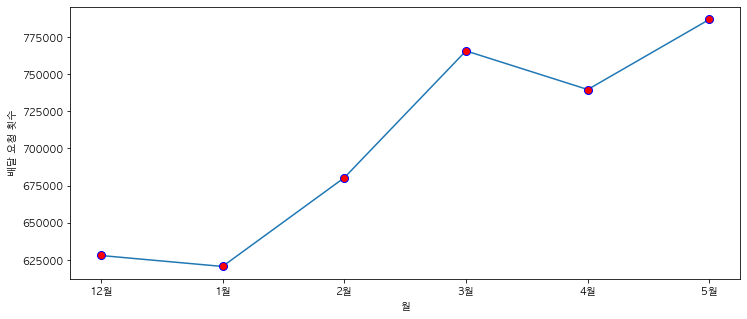

In [9]:
labels = ['12월', '1월', '2월', '3월', '4월', '5월']
f = [complete_count_order_2019, complete_count_order_1, complete_count_order_2, complete_count_order_3, complete_count_order_4, complete_count_order_5]
fig, axes = plt.subplots(figsize=(12,5))
axes.plot(labels, f, linestyle = '-', marker= 'o', markerfacecolor='r', markersize = 8, markeredgecolor = 'b')
plt.xlabel('월')
plt.ylabel('배달 요청 횟수')

- 결과 : 그래프를 살펴보게 되면, 해당 시기 중 코로나 집단감염의 사실상 시발점인 대구 신천지 코로나 사태를 살펴볼 필요성이 있습니다.  
  대구 신천지 코로나 집단감염의 시작으로 보는  31번 환자 발생 시점(2월 18일) 부근인 2월부터 증가추세를 보입니다. 코로나공포가 확산되던 3월에 배달량이 증가하는 모습을 보이며,   
  4월에 잠시 주춤하고 5월에 최고치를 찍는 형태를 보입니다.

출처 : [뉴스](https://www.ichannela.com/news/main/news_detailPage.do?publishId=000000189571)

- 그래서 실질적으로 배달이 가장 많은 5월을 코로나 중 기준 데이터로 삼고, 12월과 1월을 코로나 이전 데이터로 가정하여 비교하며 데이터 시각화를 진행했습니다.

## 1-2. 배달 업종별 배달 주문 횟수 (전체기간, 5월)

Text(0.5, 1.0, '업종별 주문횟수(5월 기준)')

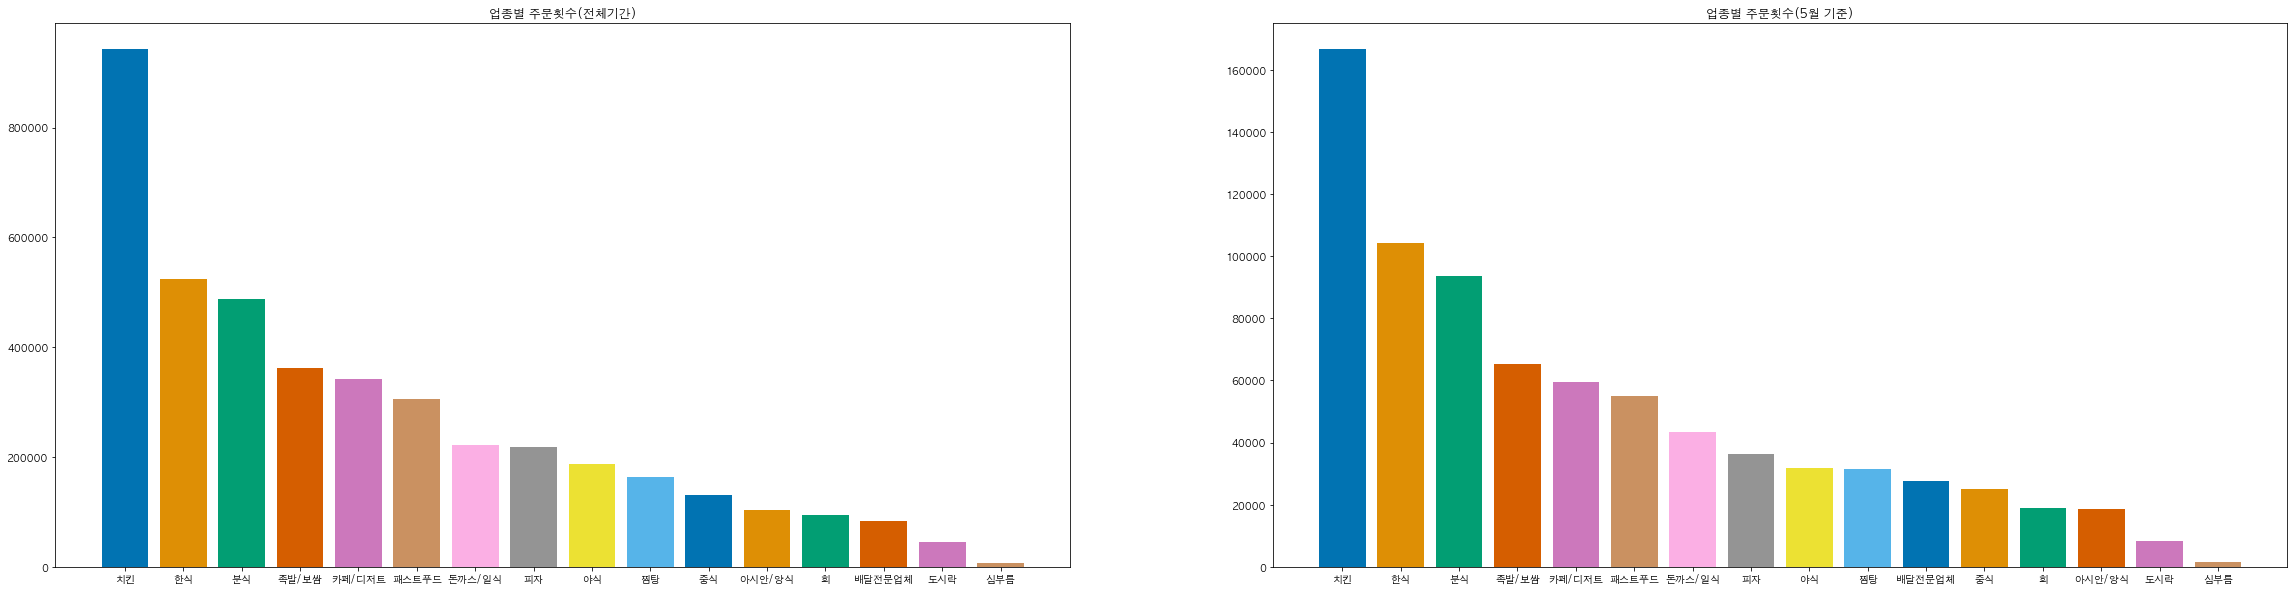

In [10]:
x1 = complete_category_order['DLVR_STORE_INDUTY_NM']
y1 = complete_category_order['count']
x2 = complete_category_order_5['DLVR_STORE_INDUTY_NM']
y2 = complete_category_order_5['count']
fig, axes=plt.subplots(1, 2, figsize = (40, 10))
color = sns.color_palette('colorblind')
axes[0].bar(x1, y1, color = color )
axes[0].set_title('업종별 주문횟수(전체기간)')
axes[1].bar(x2, y2, color = color)
axes[1].set_title('업종별 주문횟수(5월 기준)')

- 결과 : 전체기간과 2020년 5월 데이터를 살펴보면 10개의 업종은 전체 데이터와 5월 데이터가 같은 순위를 보이지만 하위순위에서 약간의 차이가 있음을 알 수 있습니다.  
  하지만 대체로 비슷한 보습을 보이기 때문에 5월 한달간 특별한 배달업종의 트랜드 전환이 있지는 않았다는 것을 할 수 있었습니다.

## 1-3. 구별 주문량(전체기간, 5월)

In [11]:
# complete_order[complete_order['DLVR_']]
com_seoul = complete_order[complete_order['DLVR_STORE_BRTC_NM'] == '서울특별시'] # 서울특별시만 데이터를 추출 = 배달상점 기준으로
gu_count = com_seoul['SN'].groupby(com_seoul['DLVR_STORE_SIGNGU_NM']).agg(['count']).reset_index().sort_values(by='count', ascending=False)
gu_count
com_seoul_5 = complete_order_5[complete_order_5['DLVR_STORE_BRTC_NM'] == '서울특별시']
gu_count_5 = com_seoul_5['SN'].groupby(com_seoul_5['DLVR_STORE_SIGNGU_NM']).agg(['count']).reset_index().sort_values(by='count', ascending=False)
gu_count_5 # 5월 구별 주문량


,DLVR_STORE_SIGNGU_NM,count
4,구로구,58129
12,영등포구,32161
5,금천구,28557
7,도봉구,14945
13,은평구,12148
8,동작구,7756
3,관악구,4480
11,양천구,3310
6,노원구,1483
9,서대문구,430


Text(0.5, 1.0, '서울특별시 구별 주문횟수(5월)')

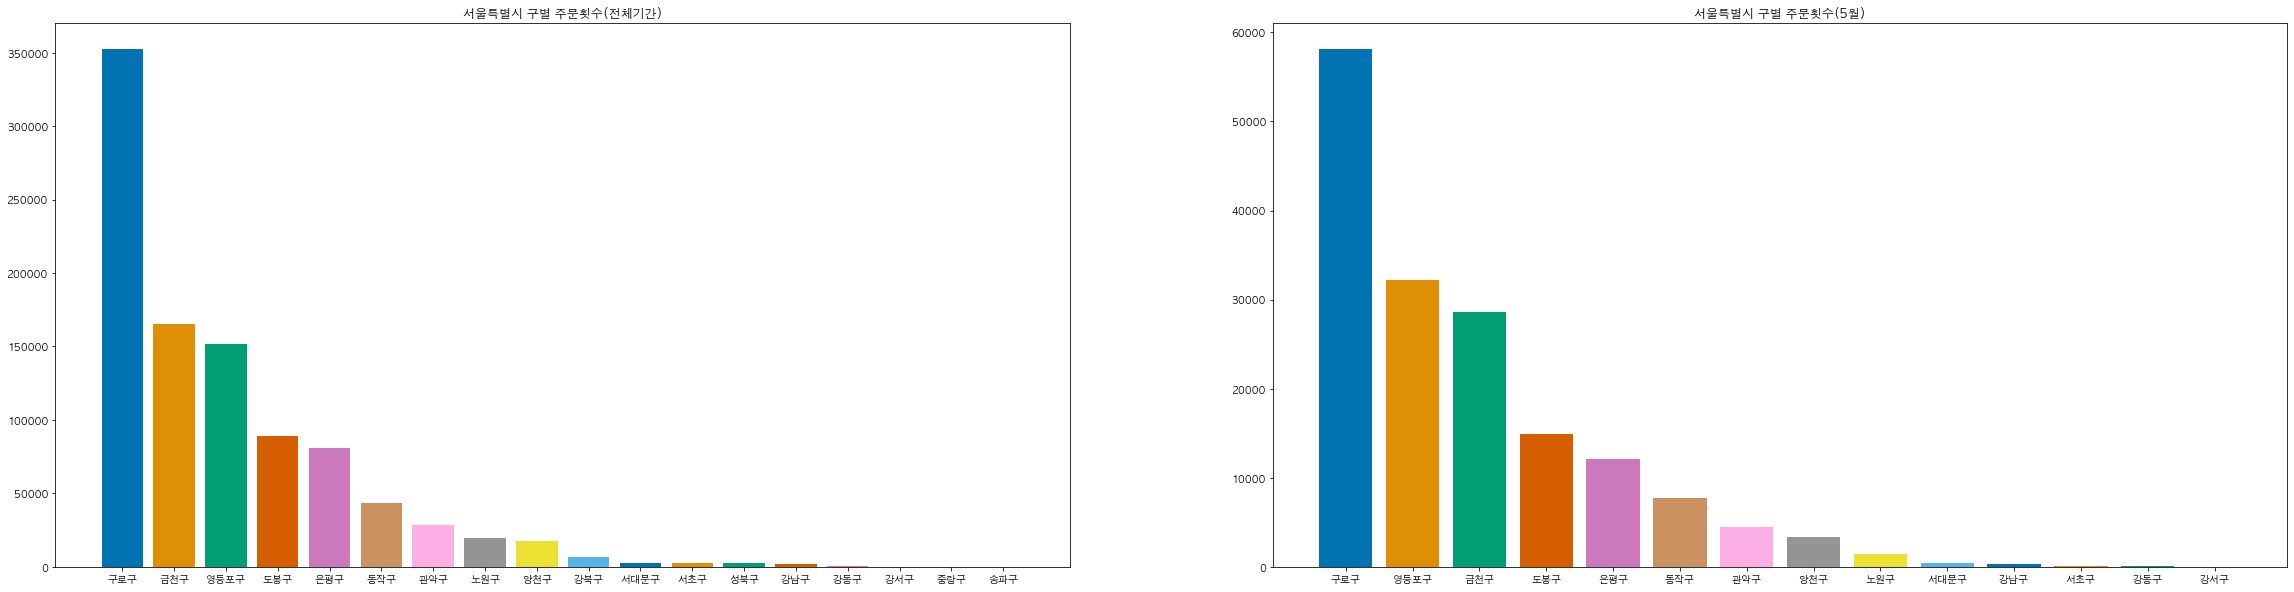

In [12]:
x1 = gu_count['DLVR_STORE_SIGNGU_NM']
y1 = gu_count['count']
x2 = gu_count_5['DLVR_STORE_SIGNGU_NM']
y2 = gu_count_5['count']
fig, axes=plt.subplots(1,2, figsize=(40,10))
axes[0].bar(x1, y1, color = color)
axes[0].set_title('서울특별시 구별 주문횟수(전체기간)')
axes[1].bar(x2, y2, color=color)
axes[1].set_title('서울특별시 구별 주문횟수(5월)')

- dlvr_call 데이터는 경기도와 서울특별시 두 광역시도 단위로 분류가 되어있었고, 데이터를 보다 유의미하게 사용하기 위해 서울특별시 데이터로 분류작업을 진행한 뒤 서울시의 구별로 정렬을 해보았습니다.  
- 결과 : 구로구가 가장 많은 배달 비중을 차지하고 있었고, 금천구와 영등포구가 뒤를 이었습니다. 하지만 2순위 3순위인 영등포구, 금천구가 전체와 5월 단일로는 주문량이 바뀌는 모습을 확인 할 수 있었습니다.  
  이 결과 상위 5개 구(구로구, 금천구, 영등포구, 도봉구, 은평구)의 배달데이터를 이용하면 대부분의 배달 데이터를 이용할 수 있을 것이라 판단하고 상위 5개구를 중심으로 살펴보기로 하겠습니다.

## 1-4. 각 구별 업종별 주문량(전체기간, 5월)

- 앞에서 서울특별시 구별 배달횟수를 통해 상위 5개구를 선정할 수 있었습니다. 상위 5개 구에 대한 어떤 업종의 배달건수가 가장 많은지 살펴보도록 하겠습니다.

In [13]:
com_seoul.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,...,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
9,3486946,2019-12-01,C000049,1,C000049,S0022458,패스트푸드,1153010800,서울특별시,구로구,...,3000,400,11500,2,NaN,2019-12-01 20:22:17,2019-12-01 20:37:16,2019-12-01 20:44:49,2019-12-01 21:04:42,\N
17,3486960,2019-12-01,C000049,1,C000049,S0022440,패스트푸드,1153010600,서울특별시,구로구,...,3000,400,13600,2,NaN,2019-12-01 22:38:54,2019-12-01 22:40:24,2019-12-01 22:49:55,2019-12-01 22:55:59,\N
18,3486961,2019-12-01,C000209,1,C000249,S0022364,치킨,1154510200,서울특별시,금천구,...,6300,300,23000,2,NaN,2019-12-01 19:29:12,2019-12-01 19:44:58,2019-12-01 19:52:32,2019-12-01 20:17:08,\N
19,3486964,2019-12-01,C000049,1,C000049,S0000200,분식,1153010600,서울특별시,구로구,...,3300,300,15000,2,NaN,2019-12-01 18:52:02,2019-12-01 19:12:08,2019-12-01 19:22:07,2019-12-01 19:43:26,\N


- 전체기간 데이터

In [14]:
guro = com_seoul[com_seoul['DLVR_STORE_SIGNGU_NM'] == '구로구'] # 구로구 상점 관련 데이터
ydp = com_seoul[com_seoul['DLVR_STORE_SIGNGU_NM'] == '영등포구'] # 영등포구 상점 관련 데이터
geumcheon = com_seoul[com_seoul['DLVR_STORE_SIGNGU_NM'] == '금천구'] # 금천구 상점 관련 데이터
dobong = com_seoul[com_seoul['DLVR_STORE_SIGNGU_NM'] == '도봉구'] # 도봉구 상점 관련 데이터
ep = com_seoul[com_seoul['DLVR_STORE_SIGNGU_NM'] == '은평구'] # 은평구 상점 관련 데이터

In [15]:
guro_category_order = guro['SN'].groupby(guro['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 구로구 업종별 카운트
ydp_category_order = ydp['SN'].groupby(ydp['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 영등포구 업종별 카운트
geumcheon_category_order = geumcheon['SN'].groupby(geumcheon['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 금천구 업종별 카운트
dobong_category_order = dobong['SN'].groupby(dobong['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 도봉구 업종별 카운트
ep_category_order = ep['SN'].groupby(ep['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 은평구 업종별 카운트

 - 5월 데이터

In [16]:
guro_5 = com_seoul_5[com_seoul_5['DLVR_STORE_SIGNGU_NM'] == '구로구'] # 5월구로구 상점 관련 데이터
ydp_5 = com_seoul_5[com_seoul_5['DLVR_STORE_SIGNGU_NM'] == '영등포구'] # 5월영등포구 상점 관련 데이터
geumcheon_5 = com_seoul_5[com_seoul_5['DLVR_STORE_SIGNGU_NM'] == '금천구'] # 5월금천구 상점 관련 데이터
dobong_5 = com_seoul_5[com_seoul_5['DLVR_STORE_SIGNGU_NM'] == '도봉구'] # 5월도봉구 상점 관련 데이터
ep_5 = com_seoul_5[com_seoul_5['DLVR_STORE_SIGNGU_NM'] == '은평구'] # 5월 은평구 상점 관련 데이터

In [17]:
guro_category_order_5 = guro_5['SN'].groupby(guro_5['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 구로구 업종별 카운트
ydp_category_order_5 = ydp_5['SN'].groupby(ydp_5['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 영등포구 업종별 카운트
geumcheon_category_order_5 = geumcheon_5['SN'].groupby(geumcheon_5['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 금천구 업종별 카운트
dobong_category_order_5 = dobong_5['SN'].groupby(dobong_5['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 도봉구 업종별 카운트
ep_category_order_5 = ep_5['SN'].groupby(ep_5['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 은평구 업종별 카운트

In [18]:
# 구로구 전체, 5월
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], start_cell= 'top-left', subplot_titles = ('전체기간 업종별 주문횟수', '5월 업종별 주문횟수'))
labels = guro_category_order['DLVR_STORE_INDUTY_NM']
values = guro_category_order['count']
labels2 = guro_category_order_5['DLVR_STORE_INDUTY_NM']
values2 = guro_category_order_5['count']
fig.add_trace(go.Pie(labels = labels, values =values), 1, 1)
fig.add_trace(go.Pie(labels = labels2, values =values2), 1, 2)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

    


- 결과 : 먼저, 구로구를 살펴보면 다음과 같습니다. 전체기간을 먼저 살펴보겠습니다. 역시, 치킨이 가장 많은 비율을 차지하고 있습니다.(31.3%) 뒤이어 패스트푸드(16.1%), 분식(13.4%), 한식(7.86%), 피자(7.33%)순이며,  
  5월 결과를 살펴보면 똑같이 치킨이 가장 많은 비율을 차지하고 있으나 전체기간대비 차지하는 비율이 증가했음을 알 수 있습니다.(31.5%) 그리고 뒤이어 패스트푸드(16.4%), 분식(13.3%), 족발/보쌈(7.15%), 한식(7%)순입니다. 5월 단일로 놓고 보면 3순위인 분식까지는 거의 비슷한 비율을 보이고 있으나, 4순위의 족발/보쌈이 많이 증가했음을 알 수 있었습니다.

In [19]:
# 영등포구 전체, 5월
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], start_cell= 'top-left', subplot_titles = ('전체기간 업종별 주문횟수', '5월 업종별 주문횟수'))
labels = ydp_category_order['DLVR_STORE_INDUTY_NM']
values = ydp_category_order['count']
labels2 = ydp_category_order_5['DLVR_STORE_INDUTY_NM']
values2 = ydp_category_order_5['count']
fig.add_trace(go.Pie(labels = labels, values =values), 1, 1)
fig.add_trace(go.Pie(labels = labels2, values =values2), 1, 2)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()


- 결과 : 다음으로 영등포구입니다. 전체기간을 살펴보면 영등포구 역시, 치킨이 가장 많은 비중을 차지하고 있으며(35.3%), 분식(11.8%), 아시안/양식(10.5%), 한식(7.99%), 족발/보쌈(7.06%)의 비율을 보이고 있습니다.  
  그리고 5월 기준으로 살펴보면 치킨(27.9%), 배달전문업체(20.3%), 한식(11.5%), 분식(8.67%), 돈까스/일식(7.67%) 순으로 나타나고 있습니다.  
  특이한 점은 치킨이 전체기간대비 5월만 따지고 보면 비율이 상대적으로 적게 나타나고 있으며, 배달전문업체가 두번쨰 비중을 차지하고 있다는 점입니다. 여기서 배달전문업체는 배달을 전문으로 하는 소자본창업형태를 말하는 것이 아닐까 생각을 헀습니다. 따라서 2020년 5월 기준 뉴스기사를 보면 실제로 포스트 코로나 시대 소자본 배달위주 음식점의 창업이 증가하고 있다는 것을 알 수 있었습니다.
  
  출처 : [뉴스](https://mnb.moneys.mt.co.kr/mnbview.php?no=2020042916218096733&ref=)

In [20]:
# 금천구 전체, 5월
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], start_cell= 'top-left', subplot_titles = ('전체기간 업종별 주문횟수', '5월 업종별 주문횟수'))
labels = geumcheon_category_order['DLVR_STORE_INDUTY_NM']
values = geumcheon_category_order['count']
labels2 = geumcheon_category_order_5['DLVR_STORE_INDUTY_NM']
values2 = geumcheon_category_order_5['count']
fig.add_trace(go.Pie(labels = labels, values =values), 1, 1)
fig.add_trace(go.Pie(labels = labels2, values =values2), 1, 2)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- 결과 : 세 번쨰는 금천구 입니다. 금천구 역시 전체비줓과 5월 모두 치킨이 가장 많은 비중을 차지하고 있습니다.(각각 26.3%, 28.9%) 뒤이어 분식, 족발/보쌈, 까지 동일하며, 4순위가 단일기간으로 볼 때 야식과,    
  패스트푸드가 비중이 뒤바뀌는 모습을 보입니다.

In [21]:
# 도봉구 전체, 5월
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], start_cell= 'top-left', subplot_titles = ('전체기간 업종별 주문횟수', '5월 업종별 주문횟수'))
labels = dobong_category_order['DLVR_STORE_INDUTY_NM']
values = dobong_category_order['count']
labels2 = dobong_category_order_5['DLVR_STORE_INDUTY_NM']
values2 = dobong_category_order_5['count']
fig.add_trace(go.Pie(labels = labels, values =values), 1, 1)
fig.add_trace(go.Pie(labels = labels2, values =values2), 1, 2)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- 결과 : 도봉구는 의외의 결과를 보여줍니다. 피자가 가장 많은 비중을 차지하며, 한식 순이며 3순위는 단일기간인 5월에는 족발/보쌈이지만 전체기간에서는 분식의 비중과 족발/보쌈의 비중이 동일하게 나와있는것을 알 수 
  있습니다. 

In [22]:
# 은평구 전체, 5월
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]], start_cell= 'top-left', subplot_titles = ('전체기간 업종별 주문횟수', '5월 업종별 주문횟수'))
labels = ep_category_order['DLVR_STORE_INDUTY_NM']
values = ep_category_order['count']
labels2 = ep_category_order_5['DLVR_STORE_INDUTY_NM']
values2 = ep_category_order_5['count']
fig.add_trace(go.Pie(labels = labels, values =values), 1, 1)
fig.add_trace(go.Pie(labels = labels2, values =values2), 1, 2)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- 결과 : 마지막으로 은평구 입니다. 은평구 역시 도봉구를 제외한 나머지 구들과 마찬가지고 치킨의 비중이 가장 크게 나타납니다. 하지만 은평구의 경우에는 2순위가 전체기간에는 분식이, 단일기간인 5월에는 한식이 큰 비중을 차지하고 있습니다. 또한 뒤이어 있는 높은비중을 차지하는 업종이 전체기간과 단일기간 가장 많은 차이를 보였습니다.
- 아마 이는 앞선 다른 구들의 데이터만큼 많은 양의 데이터를 가지고 있지 않기 때문에 발생하는 문제라고 생각합니다.(어디까지나 추측입니다 :) )


- 지금까지 각 구의 배달데이터 업종별 비중을 살펴보았습니다. 하지만 비중이 절대적인 성공지표가 아니라고 할 수 있겠습니다. 실제로 해당 업종이 높은 비율을 차지하고 있지만 해당 지역에 업체가 많다면 실제로 많은 업체가 배달을 나눠서 담당하는 형태가 되기 때문에 실질적인 수익은 그렇게 높지 않기 때문입니다. 따라서 해당 지역내에 있는 업체당 얼만큼의 배달건수를 담당하고 있으며 해당업종의 상점은 얼마나 존재하고 있는지 확인해볼 필요가 있습니다. 

- 특정 자치구에서 배달 비율이 높은 상위 30위의 업체를 분석(특정 구 전체 배달 비율 중 44%의 데이터)
- 상위 30위의 업체를 기준으로 배달 품목의 비율을 분석  

In [ ]:
df2 = pd.read_csv('주문이 완료된 데이터.csv', encoding='cp949')       # 주문이 완료처리된 데이터만 저장한 파일을 가져오기

dlv_main = df2[['PROCESS_DT','SN', 'DLVR_STORE_ID', 'DLVR_STORE_INDUTY_NM', 'DLVR_DSTN_ADSTRD_CODE', 'GOODS_AMOUNT', 'SETLE_KND_VALUE']]
dlv_main.columns = ['date', '순번', '배달상점ID', '업종명', '행정동코드','배달상품금액','결제']
dlv_main['date'] = dlv_main['date'].astype(str)                     
dlv_main['date'] = pd.to_datetime(dlv_main['date'])                  # 날짜를 datetime으로 변경
dlv_main['행정동코드'] = dlv_main['행정동코드'].astype(str)
dlv_main['행정동코드'] = dlv_main['행정동코드'].str[:-2]

code_map = pd.read_csv('행정동_2021.csv', encoding='utf-8')
code_map.drop(['생성일자','말소일자'], axis=1, inplace=True)
code_map.columns = ['행정동코드', '시도', '시군구', '읍면동']
code_map['행정동코드'] = code_map['행정동코드'].astype(str)
code_map['행정동코드'] = code_map['행정동코드'].str[:-2]
cond = code_map['읍면동'].isnull()
code_map = code_map[~cond]

dlv_main = pd.merge(dlv_main, code_map, on='행정동코드', how='inner')   # 행정동코드에 매핑에하여 시, 구, 동 데이터 merge

In [ ]:
cond1 = dlv_main['시도'] == '서울특별시'                            # 서울시 데이터
dlv_main = dlv_main.loc[cond1]

dlv_main['date'] = pd.to_datetime(dlv_main['date'])
cond2 = dlv_main['date'] >= '2020-05-01'                           # 배달건이 가장 많은 5월 데이터
dlv_may = dlv_main.loc[cond2]

dlv_id = dlv_may.pivot_table(index='배달상점ID', values='순번', columns='시군구', aggfunc='count')  # 업체별로 분석하기 위해 배달상점ID를 index로 설정

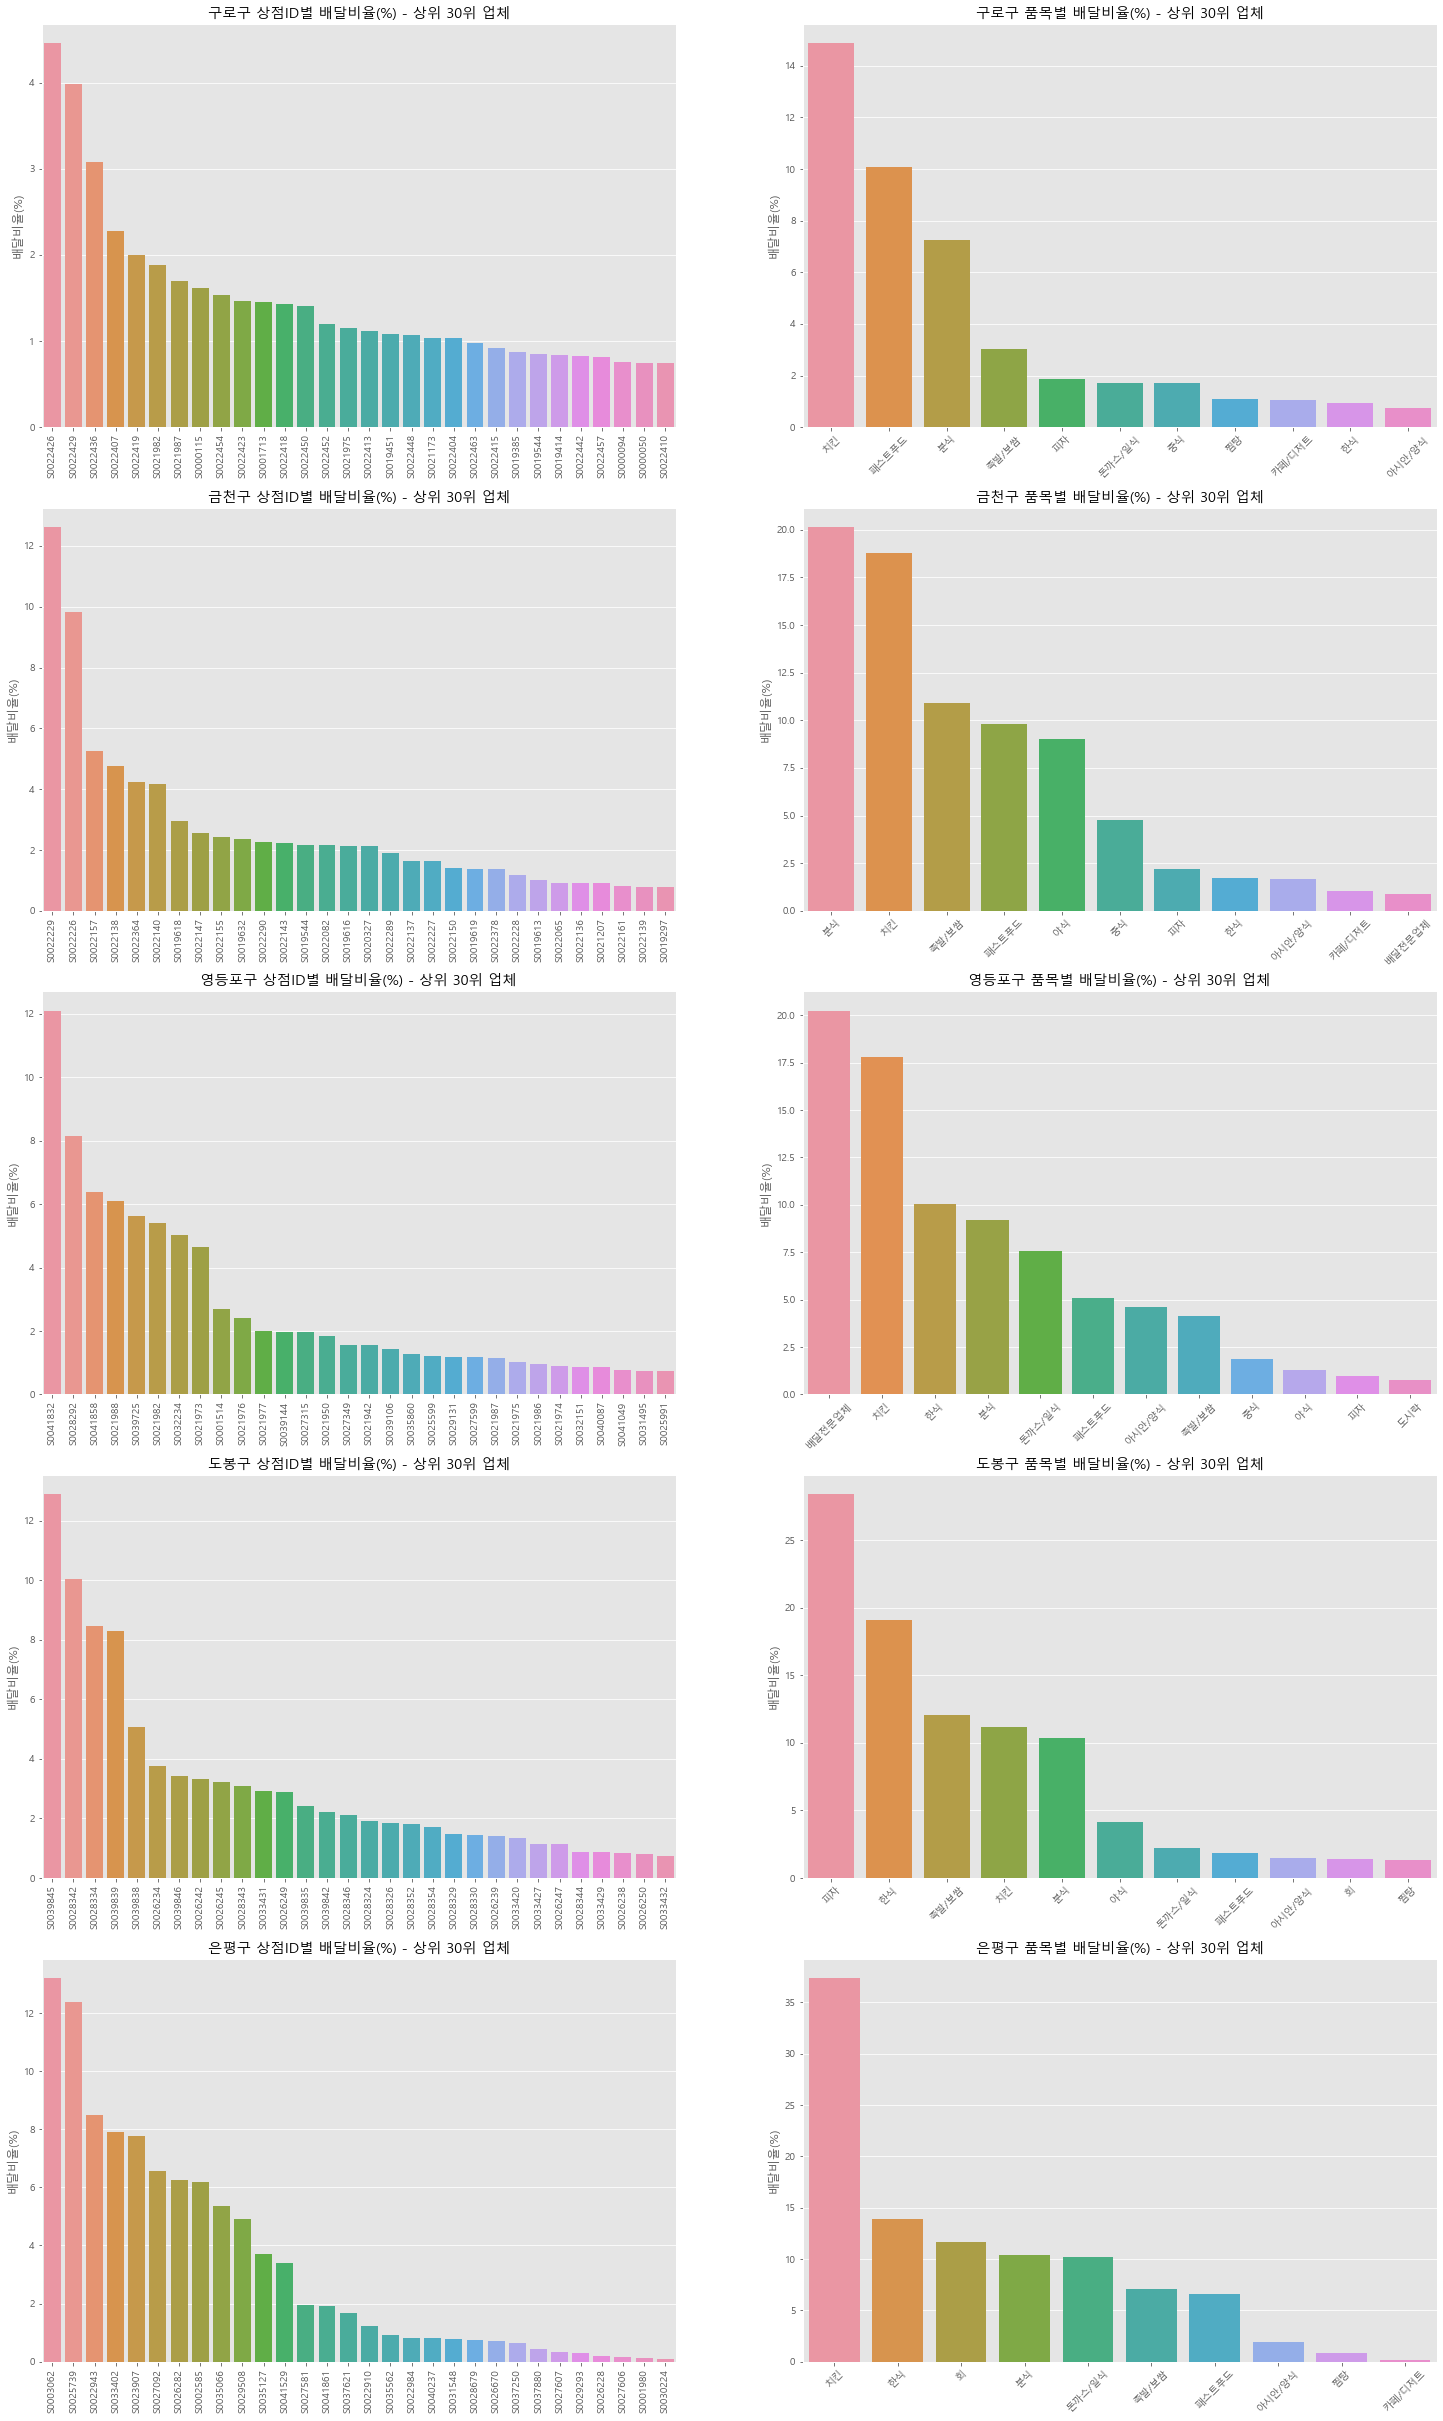

In [ ]:
gu_list = ['구로구', '금천구', '영등포구', '도봉구', '은평구']
f, ax = plt.subplots(5, 2, figsize=(25, 43))

for i in range(5):
    df_gu = dlv_id[[gu_list[i]]]
    total = int(df_gu[gu_list[i]].sum())
    df_gu['배달건수 비율'] = df_gu[gu_list[i]] / total * 100                   # 해당 구의 전체 배달 건수를 각 업체ID의 배달 건수에 나눠줌
    gu_id_rate = df_gu.sort_values(by=gu_list[i], ascending=False).head(30)   # 배달건수 비율이 높은 순으로 상위 30개 업체 추출

    top_30_index  = gu_id_rate.index
    top_30_list = top_30_index.tolist()
    y = []
    for j in range(1,31):
        y.append(j)

    y = pd.DataFrame(y)
    row = 0
    col = 1
    for k in top_30_list:
        cond = dlv_may['배달상점ID'] == k           # 상위 30위의 한 업체ID가 전체 데이터셋의 업체ID와 같다면 해당 업체ID의 업종명을 추가 
        x = dlv_may.loc[cond][['업종명']]
        y[row:col] = x[0:1]
        row += 1
        col += 1

    y.columns = ['업종명']
    gu_id_rate['업종명'] = y['업종명']
    
    for l in range(30):
        gu_id_rate.iloc[l, 2] = y.iloc[l,0]         # 상위 30위 업체ID의 업종을 추가
    
    gu_rate_nm = gu_id_rate
    nm_rate = gu_rate_nm.pivot_table(index='업종명', values='배달건수 비율', aggfunc='sum')
    top_30_nm = nm_rate.sort_values(by='배달건수 비율', ascending=False)

    sns.barplot(data=gu_id_rate, x=gu_id_rate.index, y='배달건수 비율', ax=ax[i,0])
    ax[i,0].set_title('{} 상점ID별 배달비율(%) - 상위 30위 업체'.format(gu_list[i]))
    ax[i,0].set_xlabel("")
    ax[i,0].set_ylabel("배달비율(%)")
    ax[i,0].set_xticklabels(gu_id_rate.index, rotation=90)
     
    sns.barplot(data=top_30_nm, x=top_30_nm.index, y='배달건수 비율', ax=ax[i,1])
    ax[i,1].set_title('{} 업종명별 배달비율(%) - 상위 30위 업체'.format(gu_list[i]))
    ax[i,1].set_xlabel("")
    ax[i,1].set_ylabel("배달비율(%)")
    ax[i,1].set_xticklabels(top_30_nm.index, rotation=45)

    

* 배달 수가 가장 많았던 구로구의 경우, 업체 순위가 S0022426(패스트 푸드) > S0022429(패스트 푸드) > S0022436(분식) > S0022407(치킨) 순으로 나타났지만, 상위 30위 업체의 데이터 기준으로 업종별 비율을    
  분석해보니 치킨 > 패스트푸드 > 분식 > 족발/보쌈 순으로 순위가 바뀐 것을 확인했습니다.
* 다른 자치구도 분석해 본 결과, 같은 양상을 보였습니다. 금천구의 경우 업체 순위가 S0022229(분식) > S0022226(패스트푸드) > S0022157(야식) > S0022138(중식) > S0022364(치킨) 순으로 나왔고 
  업종별 순위는 분식 > 치킨 > 족발/보쌈 > 패스트푸드 > 야식 순으로 나왔습니다. 패스트푸드 업체가 업체 2위를 했지만 업종별 비율에서는 패스트푸드가 4위가 되었고, 치킨을 파는 업체가 업체 순위에서 5위였지만 업종별 순위에서는 치킨의 배달 비율이 2위가 됐습니다.
* 영등포구의 경우 업체 랭킹 5위가 S0041832(배달전문업체) > S0028292(배달전문업체) > S0041858(돈까스) > S0021988(치킨) > S0039725(한식) 순으로 나왔고 업체별 순위는 배달전문업체 > 치킨 > 한식 > 분식 >
  돈까스/일식 순으로 나타났습니다. 위와 마찬가지로 돈까스를 파는 업체가 세 번째로 배달 비율이 높더라도 전체 업종별 품목에서는 돈까스/일식이 5위로 바뀐 것을 확인할 수 있었습니다. 
* 이는 특정 업체의 배달 순위가 높더라도 그 업체가 파는 음식(ex. 패스트푸드)의 업종별 배달비율이 다른 음식의 배달 비율보다 적을 수 있다는 것을 뜻합니다.
* 결론적으로 치킨을 파는 어떤 업체의 순위가 가장 높지 않더라도(구로구 4위), 치킨을 파는 ***업체 수***가 많으면 해당 자치구에서 치킨의 배달 비율(업종별 배달비율-구로구 1위)이 가장 높게 나타날 수 있습니다.
* 위 분석결과로 저희팀은 각 배달 품목의 **업체 수**가 중요하다고 생각했고, 경쟁사가 적으면서도 배달 비율이 높은 업종(음식)을 알아보기 위한 분석을 해봤습니다.

## 1-5. 업체수 및 배달생산비율

### - 각 자치구의 업종별 업체 수를 구하여 어떤 업종이 경쟁사가 적으면서 배달율이 높은지 분석

In [ ]:
# 위와 같은 알고리즘으로 전체 업체 ID로 index를 설정한 후 업종명을 추가
dlv_id = dlv_may.pivot_table(index='배달상점ID', values='순번', columns='시군구', aggfunc='count')
df_gu = dlv_id[['구로구']]
gu_rate = df_gu.sort_values(by='구로구', ascending=False)
total_index  = gu_rate.index    
total_list = total_index.tolist()
y = []  
for i in range(1,789):                     
    y.append(i)

y = pd.DataFrame(y)
row = 0
col = 1
for i in total_list:
    cond = dlv_may['배달상점ID'] == i
    x = dlv_may.loc[cond][['업종명']]
    y[row:col] = x[0:1]
    row += 1
    col += 1
y.columns = ['업종명']
gu_rate['업종명'] = y['업종명']    
for i in range(788):
    gu_rate.iloc[i, 1] = y.iloc[i,0]   # 상점ID의 업종명 추가

In [4]:
cond = gu_rate['구로구'].isnull() == False    # 구로구에 배달 데이터가 없는 업체ID가 존재하기 때문에 null값은 제외
count = gu_rate.loc[cond]
count['업종명'].value_counts()

치킨        111
한식         68
카페/디저트     64
분식         36
야식         36
족발/보쌈      34
돈까스/일식     33
찜탕         30
피자         23
패스트푸드      20
중식         15
회          12
아시안/양식     11
배달전문업체      7
도시락         5
Name: 업종명, dtype: int64

* 구로구의 경우, 업종별 배달 비율에서 치킨 > 패스트푸드 > 분식 > 족발/보쌈 > 피자 순으로 높았고, 업체수는 치킨 > 한식 > 카페 > 분식 > 야식 순으로 나타났습니다.
치킨의 업체수는 111개로 업체수가 많아 1위를 한 것으로 보여지고,
패스트푸트는 업체수가 20개로 낮은 업체수로도 높은 배달 비율을 보이는 것을 확인할 수 있었습니다.
또한, 한식의 업체수가 68로 두 번쨰로 많지만, 업종별 배달 비율에서 상위 8위였습니다.
* 결론적으로 패스트푸드가 경쟁사가 적으면서 배달 비율이 높은 업종이라는 것을 확인했습니다.

In [5]:
dlv_id = dlv_may.pivot_table(index='배달상점ID', values='순번', columns='시군구', aggfunc='count')
df_gu = dlv_id[['금천구']]          # 위와 같은 방법으로 금천구의 배달 업체 수를 구함
gu_rate = df_gu.sort_values(by='금천구', ascending=False)
total_index  = gu_rate.index    
total_list = total_index.tolist()
y = []  
for i in range(1,789):                     
    y.append(i)

y = pd.DataFrame(y)
row = 0
col = 1
for i in total_list:
    cond = dlv_may['배달상점ID'] == i
    x = dlv_may.loc[cond][['업종명']]
    y[row:col] = x[0:1]
    row += 1
    col += 1
y.columns = ['업종명']
gu_rate['업종명'] = y['업종명']
for i in range(788):
    gu_rate.iloc[i, 1] = y.iloc[i,0]

In [6]:
cond = gu_rate['금천구'].isnull() == False
count = gu_rate.loc[cond]
count['업종명'].value_counts()

치킨        35
카페/디저트    22
한식        20
족발/보쌈     19
분식        16
야식        13
찜탕        10
돈까스/일식     9
패스트푸드      6
중식         6
피자         6
아시안/양식     4
배달전문업체     2
회          1
도시락        1
Name: 업종명, dtype: int64

* 금천구의 경우, 업종별 배달 비율에서 분식 > 패스트푸드 > 야식 > 중식 > 치킨 순으로 높았고, 업체수는 치킨 > 카페/디저트 > 한식 > 족발/보쌈 > 분식 순으로 나타났습니다.
금천구도 마찬가지로 업종 배달 비율은 1위이지만 업체수는 16개로 치킨(35)보다 훨씬 적은 것을 확인할 수 있었습니다.

In [8]:
dlv_id = dlv_may.pivot_table(index='배달상점ID', values='순번', columns='시군구', aggfunc='count')
df_gu = dlv_id[['영등포구']]        # 위와 같은 방법으로 영등포구의 배달 업체 수를 구함
gu_rate = df_gu.sort_values(by='영등포구', ascending=False)
total_index  = gu_rate.index    
total_list = total_index.tolist()
y = []  
for i in range(1,789):                    
    y.append(i)

y = pd.DataFrame(y)
row = 0
col = 1
for i in total_list:
    cond = dlv_may['배달상점ID'] == i
    x = dlv_may.loc[cond][['업종명']]
    y[row:col] = x[0:1]
    row += 1
    col += 1
y.columns = ['업종명']
gu_rate['업종명'] = y['업종명']
for i in range(788):
    gu_rate.iloc[i, 1] = y.iloc[i,0]

In [9]:
cond = gu_rate['영등포구'].isnull() == False
count = gu_rate.loc[cond]
count['업종명'].value_counts()

치킨        30
한식        21
카페/디저트    12
분식        11
족발/보쌈     11
야식         6
찜탕         6
회          6
중식         5
피자         5
돈까스/일식     4
패스트푸드      4
도시락        3
배달전문업체     2
아시안/양식     1
Name: 업종명, dtype: int64

* 영등포구의 경우, 업종별 배달 비율에서 배달전문업체 > 치킨 > 한식 > 분식 > 돈까스/일식 순으로 높았고, 업체수는 치킨 > 한식 > 카페/디저트 > 분식 > 족발/보쌈 순으로 나타났습니다.
하지만, null값을 제외한 업체수를 count한 걸과 배달전문업체가 2개로 나왔으며 배달비율이 가장 높은 것으로 보여졌습니다. 
* 위에 문제로 저희 팀은 영등포구 배달 데이터상에 문제점이 있다고 생각하여 배달전문업체의 수를 분석 업종에서 제외하기로 결정했습니다.  

### - 서울시 공공데이터의 거주인구수를 불러와 배달 데이터와 병합
### - 자치구의 배달 건수에 **거주인구**를 나누어 배달생산율을 구하여 비교하기 

In [76]:
dlv_gu = dlv_may.pivot_table(index='시군구', values='순번', aggfunc='count')

population = pd.read_csv('seoul_population.tsv', thousands=',', sep='\t', header=2)
population.drop([0], inplace=True)
population.rename(columns={'자치구': '시군구'}, inplace=True)
pop_gu = population[['시군구', '계']]

dlv_gu_pop = pd.merge(dlv_gu, pop_gu, on='시군구', how='inner')
dlv_gu_pop['배달생산율'] = dlv_gu_pop['순번'] / dlv_gu_pop['계'] * 100

dlv_gu_pop.sort_values(by='배달생산율', ascending=False).head(5)

,시군구,순번,계,배달생산율
5,구로구,62340,432488,14.414273
6,금천구,28011,247835,11.302278
17,영등포구,26852,407367,6.591599
8,도봉구,12065,327361,3.685534
19,은평구,12164,484043,2.513000


* 단순히 자치구의 배달 건수로 분석한다면 당연히 거주인구가 밀집되어 있는 곳의 배달 건수가 높을 것이라 생각했습니다.
* 이를 해결하기 위해 외부 인구데이터를 가져와 거주인구 당 배달생산율을 구하여 분석했습니다.
* 실제로 금천구와 영등포구의 배달 건수(순번)는 크게 차이가 나지 않지만 배달생산율로 보면 2배 정도 차이가 납니다.
* 위와 같은 이유들로 저희팀은 배달생산율을 이용하여 어떤 자치구가 배달문화가 활발하게 이루어지고 있는지 확인할 수 있었습니다.  

## 1-6. 주중 주말 차이(5월 기준)

- 주중과 주말 데이터를 분석해보면서, 모두가 당연하게 생각하는 주중과 주말의 차이를 살펴보고자 했습니다. 분명 업종들간에는 평일에 수요가 있는 업종도 존재할 것이고, 주말에 상대적으로 많은 수요를 가지는 업종도 존재할 것이라 생각했습니다.
- 주중은 월~목요일, 주말은 실질적 주말인 금~일요일로 구분해서 살펴보았습니다.

In [23]:
complete_order['day-of-week'] = complete_order['PROCESS_DT'].dt.weekday # 그 주의 어떤 요일에 해당하는지 표현
complete_order.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,...,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,day-of-week
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,...,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,6
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,...,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,6
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,...,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,6
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,...,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,6
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,...,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N,6


In [24]:
data_monday = complete_order.loc[complete_order['day-of-week'] == 0] #각 날짜의 월요일만
data_tuesday = complete_order.loc[complete_order['day-of-week'] == 1] #각 날짜의 화요일만
data_wensday = complete_order.loc[complete_order['day-of-week'] == 2] # 각 날짜의 수요일만
data_thursday = complete_order.loc[complete_order['day-of-week'] == 3] # 각 날짜의 목요일만
data_friday = complete_order.loc[complete_order['day-of-week'] == 4] # 각 날짜의 금요일만
data_saturday = complete_order.loc[complete_order['day-of-week'] == 5]# 각 날짜의 토요일만
data_sunday = complete_order.loc[complete_order['day-of-week'] == 6] # 각 날짜의 일요일만

In [25]:
data_weekday = pd.concat([data_monday,data_tuesday,data_wensday,data_thursday], axis=0, join='outer')
data_weekend = pd.concat([data_friday, data_saturday, data_sunday], axis=0, join='outer')
data_weekday = data_weekday.loc[data_weekday['DLVR_STORE_BRTC_NM'] == '서울특별시'].reset_index()
data_weekend = data_weekend.loc[data_weekend['DLVR_STORE_BRTC_NM'] == '서울특별시'].reset_index()
# 데이터를 월요일부터 목요일까지 주중, 금요일부터 일요일까지 주말로 분류해서 서울시데이터만 추출한다.

In [26]:
dwd_count = data_weekday['SN'].groupby(data_weekday['DLVR_STORE_INDUTY_NM']).agg(['count']).reset_index(drop=False) # 업종별로 카운트
dwe_count = data_weekend['SN'].groupby(data_weekend['DLVR_STORE_INDUTY_NM']).agg(['count']).reset_index(drop=False)

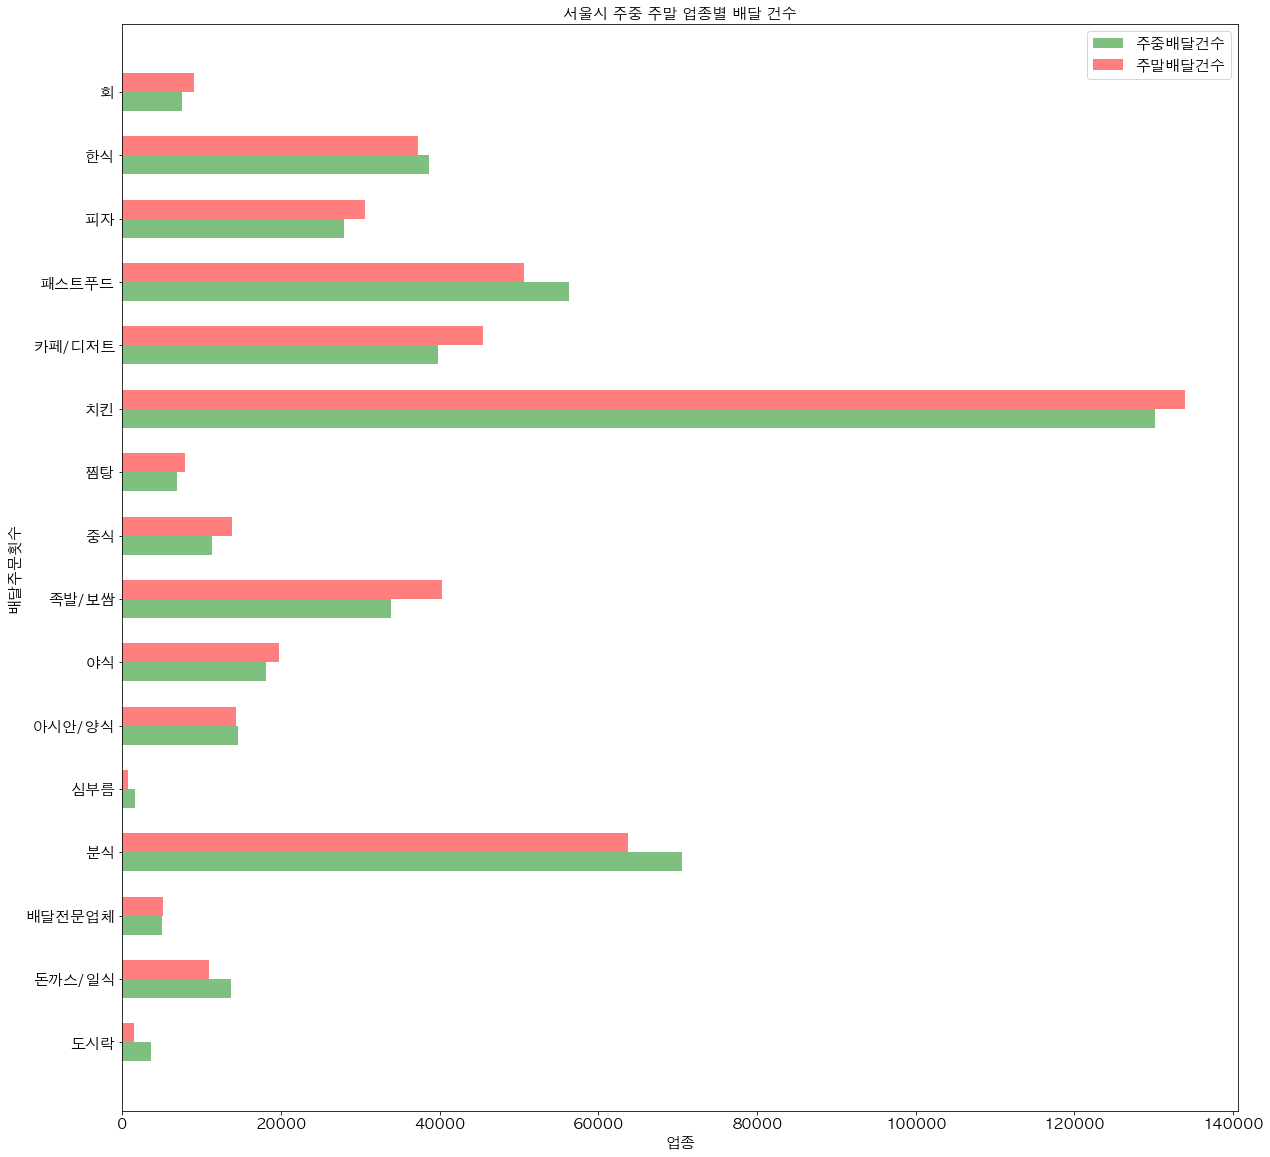

In [27]:
labels = dwd_count['DLVR_STORE_INDUTY_NM']
x = np.arange(len(labels))
count1 = dwd_count['count']
count2 = dwe_count['count']
width = 0.3

fig, axes = plt.subplots(figsize = (20,20))
axes.barh(x - width/2, count1, width, align='center', color='green', alpha=0.5)
axes.barh(x + width/2, count2, width, align='center', color='red', alpha=0.5)

plt.xticks(fontsize = 15)
plt.yticks(x)
axes.set_yticklabels(labels, fontsize = 15)
plt.xlabel('업종', fontsize = 15)
plt.ylabel('배달주문횟수', fontsize = 15)
plt.title('서울시 주중 주말 업종별 배달 건수', fontsize = 15)
plt.legend(['주중배달건수', '주말배달건수'], fontsize = 15)

- 결과 : 실제로 주중과 주말에는 데이터간의 차이가 존재했습니다. 대체로 주말에 건수가 증가하는 모습을 보였지만, 도시락, 돈까스/일식, 분식, 아시안/양식, 패스트푸드, 한식 등 일상적으로 빠른 식사가 필요한 점심이나 평일저녁에도 부담없이 즐길 수 있는 업종들은 주말보다 주중에 더 배달량이 많았으며, 치킨, 족발/보쌈, 치킨, 회, 피자 등 오랜시간을 두고 술과 곁들여 먹거나 가족끼리 즐기는 등의 음식들은 주말에 배달이 더 많은 모습을 보였습니다.   
  
- 이를 통해 창업을 할 때 입지선정만큼 업종의 선택이 중요하며, 해당 업종이 어떤 타겟층을 노리고 있고, 주 타겟층의 행동시간대와 패턴등을 파악할 필요성도 있다고 생각할 수 있었습니다.

## 1-7. 2019-12월, 2020-1월 업종별 평균 건수 대비 2020년 5월 배달 건수의 증가율

- 지금까지 월별 배달요청 횟수와, 배달 업종별 배달 주문횟수, 구별 주문량, 그리고 각 구에 어떤 업종이 가장 많이 비중을 차지하는지, 그리고 업종당 비율, 주중과 주말의 업종별 차이 등을 살펴보았습니다.  
  그렇다면 실제로 모든 업종이 코로나 이전보다 이후에 성장했을까? 라는 질문을 떠올리게 만듭니다. 코로나 이후 성장 했다면 앞으로도 포스트코로나시대에 비교적 적합한 업종이라는 것을 나타내게 될 겁니다.
- 현재 dlvr_call 데이터 내의 2019년 12월부터 2020년 5월 중 코로나 이전을 대표할 수 있는 2019년 12월과, 2020년 1월의 배달 평균과 코로나 이후 제일 마지막 데이터인 2020년 5월의 배달 데이터를 가지고 비교해 보았습니다.

In [28]:
target_year = 2019
target_month = 1
before_covid_12 = complete_order.query('PROCESS_DT.dt.year == @target_year')
before_covid_12 = before_covid_12.loc[before_covid_12['DLVR_STORE_BRTC_NM'] == '서울특별시'].reset_index()
before_covid_01 = complete_order.query('PROCESS_DT.dt.month == @target_month')
before_covid_01 = before_covid_01.loc[before_covid_01['DLVR_STORE_BRTC_NM'] == '서울특별시'].reset_index()
complete_order.query('"2020-05-01"<= PROCESS_DT <= "2020-05-31"')

cond = complete_order['PROCESS_DT'] >= '2020-05-01'
cond2 = complete_order['PROCESS_DT'] <= '2020-05-31'
a = complete_order.loc[(cond) & (cond2)]
after_covid = a.sort_values(by='PROCESS_DT')
after_covid = after_covid.loc[after_covid['DLVR_STORE_BRTC_NM'] == '서울특별시'].reset_index()
# after_covid
# 2019년 12월과 1월의 서울특별시 데이터만 추출해서 평균을 구한 뒤 5월 데이터와 비교하기 위한 작업

In [29]:
b_covid_12 = before_covid_12['SN'].groupby(before_covid_12['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False)
b_covid_01 = before_covid_01['SN'].groupby(before_covid_01['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False) # 카운트
b_covid_mean = b_covid_01 + b_covid_12
b_covid_mean = b_covid_mean.sort_values(by='count', ascending=False)
b_covid_mean = b_covid_mean / 2 # 2019년 1월과 2020년 1월의 평균을 내는과정
a_covid = after_covid['SN'].groupby(after_covid['DLVR_STORE_INDUTY_NM']).agg(['count']).sort_values(by='count', ascending=False).reset_index() # 5월 업종별 카운트

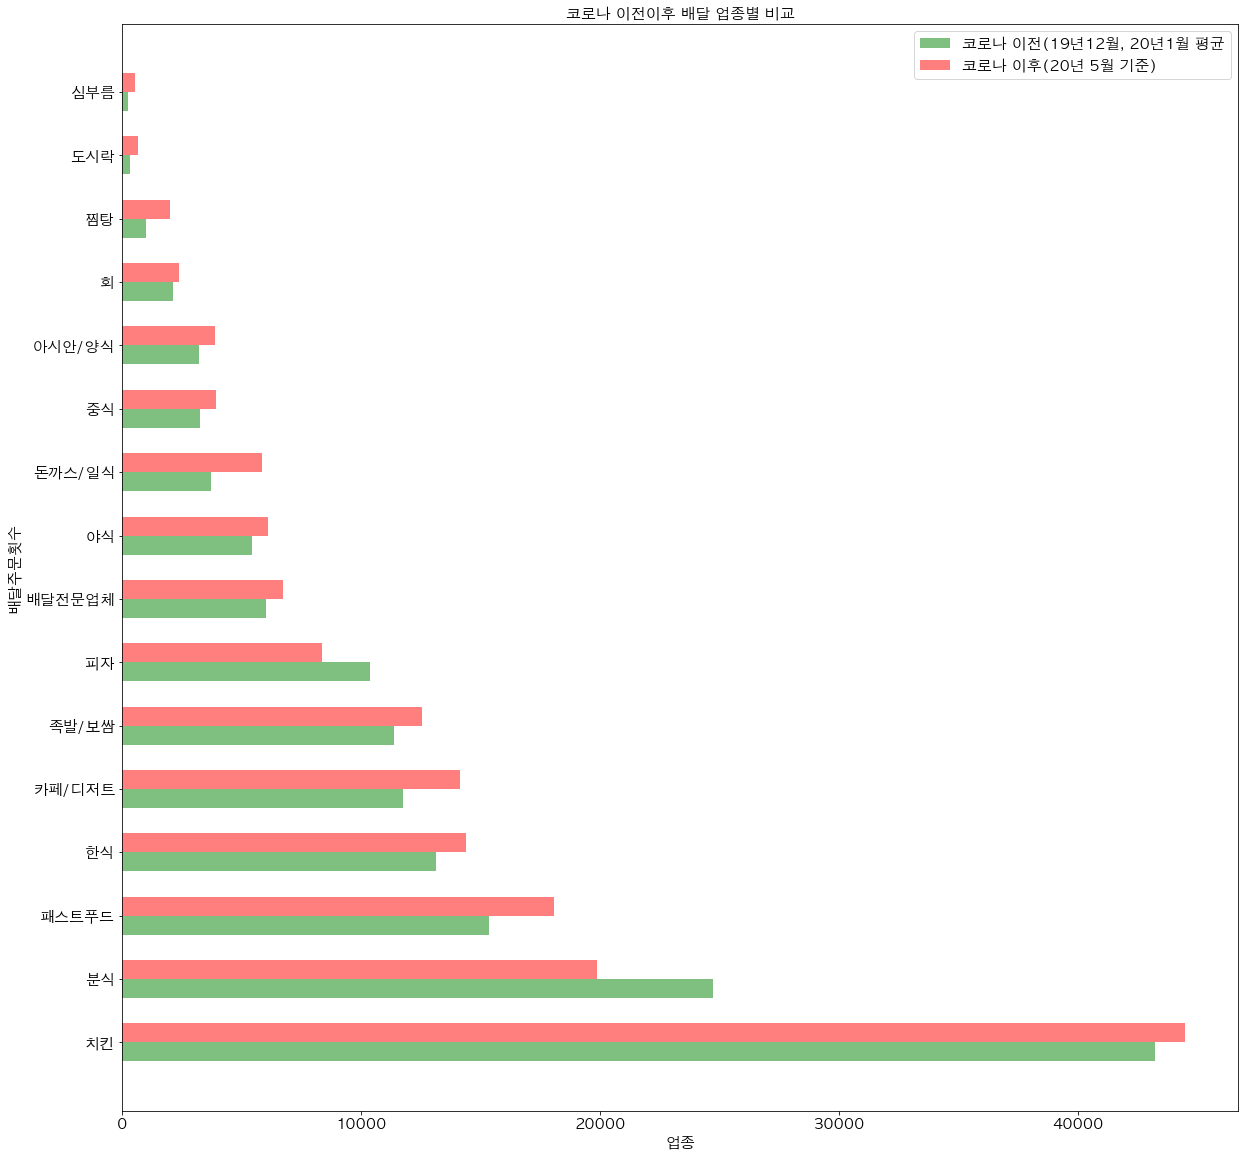

In [30]:
labels = a_covid['DLVR_STORE_INDUTY_NM']
x = np.arange(len(labels))
count1 = b_covid_mean['count']
count2 = a_covid['count']
width = 0.3

fig, axes = plt.subplots(figsize = (20,20))
axes.barh(x - width/2, count1, width, align='center', color='green', alpha=0.5)
axes.barh(x + width/2, count2, width, align='center', color='red', alpha=0.5)

plt.xticks(fontsize = 15)
plt.yticks(x)
axes.set_yticklabels(labels, fontsize = 15)
plt.xlabel('업종', fontsize = 15)
plt.ylabel('배달주문횟수', fontsize = 15)
plt.title('코로나 이전이후 배달 업종별 비교', fontsize = 15)
plt.legend(['코로나 이전(19년12월, 20년1월 평균', '코로나 이후(20년 5월 기준)'], fontsize = 15)

- 결과 : 결과는 다음과 같습니다. 대부분의 업종이 이전보다 이후 증가했지만 일부 업종들에서 코로나 이전(2019년 12월과 2020년 1월의 평균) 보다 배달건수가 감소한 모습을 보였습니다. 해당 업종은 다음과 같습니다. 분식, 피자 두개 업종입니다. 앞선 분석을 통해 알 수 있었던 사실 중 도봉구에서는 피자가 가장 많은 배달비중을 차지했음에도 실질적으로 5월 기준으로는 이전보다 감소했고, 마찬가지고 분식은 대부분 구에서 상위권 비중을 차지하는 모습을 보였으나, 실질적으로 감소하고 있음을 알 수 있습니다. 이를 종합적으로 볼 때 분식은 높은 비중을 차지하고 있지만 감소추세에 있기 때문에 위험할 수도 있고, 마찬가지로 피자 또한 특정 구에서는 높은 비중을 차지하고 있지만 실질적으로는 감소추세에 있다고 말할 수 있습니다.

## 1-8. 재난지원금 여부에 따른 변화(2020년 5월 18일 기준)

2020년 처음으로 코로나로 인해 피폐해져가는 국민들의 생활과 시장경제에 활력을 불어넣는 목적으로 정부는 재난지원금을 편성하고 국민들에게 지급했습니다. 5월 11일 부터 온라인으로 신청을 받았으며 5월 18일부터 오프라인 신청을 받아 그자리에서 바로 지급이 시작되었습니다. 그래서 실질적 지급 시작일인 5월 18일을 기준으로 5월데이터를 나눠 먼저 비교를 해보았습니다.

출처 : [뉴스](https://www.kyongbuk.co.kr/news/articleView.html?idxno=2040163)

In [31]:
after_covid.head()

,index,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,...,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,day-of-week
0,2750314,8893732,2020-05-01,C000101,1,C000101,S0027315,한식,1156010100,서울특별시,...,300,21000,2,NaN,2020-05-01 08:17:06,2020-05-01 08:17:38,2020-05-01 08:27:30,2020-05-01 08:37:38,\N,4
1,2768348,8921203,2020-05-01,C000026,1,C000026,S0028330,족발/보쌈,1132010600,서울특별시,...,55,35000,2,NaN,2020-05-01 20:49:33,2020-05-01 20:50:58,2020-05-01 21:01:56,2020-05-01 21:10:55,\N,4
2,2768347,8921202,2020-05-01,C000129,1,C000129,S0035127,회,1138010400,서울특별시,...,400,26000,1,승인:신한카드,2020-05-01 21:00:28,2020-05-01 21:00:47,2020-05-01 21:07:33,2020-05-01 21:10:54,\N,4
3,2768337,8921187,2020-05-01,C000026,1,C000026,S0028327,분식,1132010600,서울특별시,...,55,19000,2,NaN,2020-05-01 20:51:11,2020-05-01 20:51:35,2020-05-01 21:06:44,2020-05-01 21:22:52,\N,4
4,2768331,8921179,2020-05-01,C000049,1,C000049,S0001249,카페/디저트,1153010800,서울특별시,...,300,16900,2,NaN,2020-05-01 21:01:53,2020-05-01 21:07:59,2020-05-01 21:20:19,2020-05-01 21:28:14,\N,4


In [32]:
before_18 = after_covid.query('"2020-05-01"<= PROCESS_DT <= "2020-05-18"')
after_18 = after_covid.query('"2020-05-19"<= PROCESS_DT <= "2020-05-31"')
before_18_sum = before_18['SN'].groupby(before_18['DLVR_STORE_LEGALDONG_CODE']).agg(['count']).sum()
after_18_sum = after_18['SN'].groupby(after_18['DLVR_STORE_LEGALDONG_CODE']).agg(['count']).sum()
before_18_sum = before_18_sum.to_frame()
after_18_sum = after_18_sum.to_frame()
after_18_sum.columns = ['합계']
before_18_sum.columns = ['합계']
# 5월을 살펴보았으나 의미가 없다고 판단하였음.


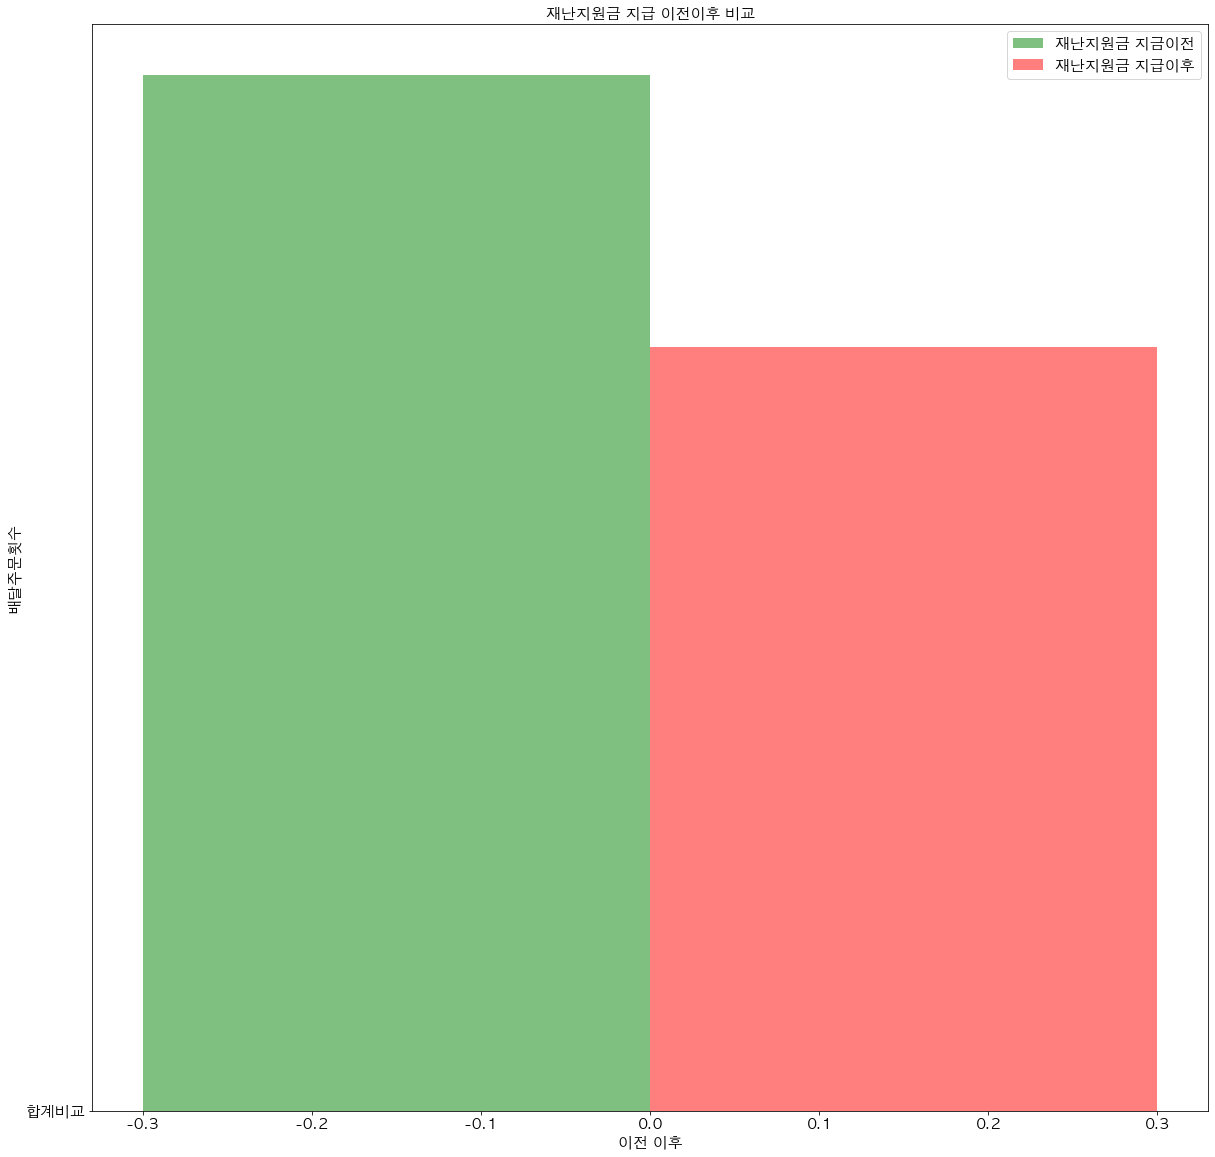

In [33]:
labels = ['합계비교']
x = np.arange(len(labels))
count1 = before_18_sum['합계']
count2 = after_18_sum['합계']
width = 0.3

fig, axes = plt.subplots(figsize = (20,20))
axes.bar(x - width/2, count1, width, align='center', color='green', alpha=0.5)
axes.bar(x + width/2, count2, width, align='center', color='red', alpha=0.5)

plt.xticks(fontsize = 15)
plt.yticks(x)
axes.set_yticklabels(labels, fontsize = 15)
plt.xlabel('이전 이후', fontsize = 15)
plt.ylabel('배달주문횟수', fontsize = 15)
plt.title('재난지원금 지급 이전이후 비교', fontsize = 15)
plt.legend(['재난지원금 지금이전', '재난지원금 지급이후'], fontsize = 15)

- 결과 : 5월 18일 재난지원금이 지급된 이후 소비가 증가하면서, 배달수요도 증가할 것이라는 기대와 다르게 데이터 상으로는 이후 오히려 감소한 모습을 보이고 있습니다. 하지만 이는 실제로 5월 18일 이전과 이후의 일자가 동일하게 측정되지 않고, 이전의 일자수가 이후 일자수보다 많아서 완전한 신뢰도를 가지기는 어렵지만 분석의 차원에서 접근해 보았던 것을 담아보았습니다.

## 1-9. dlvr_call 데이터의 한계/제한되는 점

-- 데이터가 누락되어있는 부분이 많이 존재합니다. 설명하기 힘든 데이터의 부분이 있고, dlvr_call의 ‘GOODS_AMOUNT’에는 상품 금액이 0인 것들도 존재합니다. 이는 한가지 업종이 아닌 다양한 업종에서 나타나고 있습니다.  
  
-- 상품 관련해서 단일품목인지, 해당 업장의 배달총액인지 제대로 알기 힘들기 때문에 가격정보를 이용하는데 한계가 있습니다.  
  
-- 이상하리만큼 큰 상품금액이 존재하며, 이는 다양한 업종에서 나타납니다.(단체주문으로 가정해 볼 수 있겠으나 확실하지 않습니다.)  
  
-- 지역마다 배달데이터를 제공해주는 업체의 수가 상이합니다. 이는 데이터가 편중되어 당연히 사람이 많을 것으로 생각했던 곳들의 데이터가 적어 다른지역보다 적게 나와 유의미하게 활용하기 힘들게 만듭니다.  
  
-- 2020년 5월 까지 데이터 밖에 존재하지 않기 때문에, 실질적으로 코로나가 창궐하기 시작한 5월이후 데이터와 연관짓기가 어려습니다.  
  
-- 대부분 데이터가 상위 5개구에 한정되어 있어서 많은데이터를 이용해서 신뢰감있는 분석을 위해서는 상위 5개구 이외의 데이터는 이용하기 어렵습니다. 실제로 강남구, 송파구 등은 인구 유동량이 많고, 실제로 1인가구나 기타 인구가 많을것으로 예상되나, 배달 데이터 상으로는 그 수치가 적어서 유의미하게 활용하기가 어렵다는 한계가 있습니다.

## **외부데이터**

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1-10. 2020년 상위 5개구 주요상권 임대료 비교 (단위 : 만 원) (출처 :  [에이원감정평가](https://github.com/gprms8384/CBNU--/files/7026661/_._._._.__.pdf ))

창업을 위한 최적화된 구를 설치하기 위해서 고려해야할 사항 중 임대료 부분을 간과할 수 없을 것이라 생각했습니다. 따라서 2020년에 서울시에 (주)에이원 감정평가법인이 제출한 보고서를 기준으로 주요상권의 평균금액을 통해 최적의 구 위치를 지정해보고자 했습니다. 이를 통해 어떤 구가 가장 저렴한 임대료를 가지고 있는지 확인해보고자 했습니다.  

앞의 결과로 도출된 상위 5개구를 기준으로 하였으며, 여기서 통상임대료는 5.41/m2 기준 보증금*5.625%/12개월+월세+공용관리비로 계산된 것입니다.

In [34]:
values_landing = pd.read_csv('/Users/janghyeseong/Desktop/임대료.csv', encoding='cp949')
values_landing_V = values_landing.pivot_table(index = ['구명', '상권명'], values='통상임대료(2020년)')
values_landing_mean = values_landing['통상임대료(2020년)'].groupby(values_landing['시군구코드']).agg(['mean']).reset_index()
values_landing_mean_N = values_landing['통상임대료(2020년)'].groupby(values_landing['구명']).agg(['mean']).sort_values(by='mean', ascending=True).reset_index()
values_landing_mean['시군구코드'] = values_landing_mean['시군구코드'].astype(str)
values_landing_mean.info()
print('-'*80)
values_landing_mean_N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구코드   5 non-null      object 
 1   mean    5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes
--------------------------------------------------------------------------------


,구명,mean
0,금천구,3.100000
1,구로구,4.781667
2,은평구,5.147500
3,영등포구,6.078333
4,도봉구,6.110000


- 결과 : 해당 결과를 통해 금천구가 가장 저렴한 임대료를 가지고 있으며, 뒤이어 구로구, 은평구, 영등포구, 도봉구 순으로 나열할 수 있었습니다.
  이를 통해 최적의 위치는 금천구가 가장 적합하다고 볼 수 있습니다.

In [2]:
geo_path = '/Users/janghyeseong/Desktop/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path))

In [36]:
seoul_map = folium.Map(location=[37.562225, 126.978555], tiles='cartodbpositron', zoom_start=11)
seoul_map.choropleth(
    geo_data=geo_str,
    name='서울시 5개구 임대료 비교',
    data= values_landing_mean,
    columns=['시군구코드', 'mean'],
    key_on='feature.properties.code',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = '임대료(2020년/ 5.41제곱미터기준)'
)
folium.Marker(
  location=[37.49737870816739, 126.85374764301679],
  popup='구로구 : 4.781667',
  icon=folium.Icon(color='blue',icon='flag')
).add_to(seoul_map)
folium.Marker(
  location=[37.46186115870328, 126.90177283109755],
  popup='금천구 : 3.100000',
  icon=folium.Icon(color='blue',icon='flag')
).add_to(seoul_map)
folium.Marker(
  location=[37.51524661637324, 126.90336932026675],
  popup='영등포구 : 6.078333',
  icon=folium.Icon(color='blue',icon='flag')
).add_to(seoul_map)
folium.Marker(
  location=[37.66249100659983, 127.04163504153743],
  popup='도봉구 : 6.110000',
  icon=folium.Icon(color='blue',icon='flag')
).add_to(seoul_map)
folium.Marker(
  location=[37.60839469164366, 126.91942291667074],
  popup='은평구 : 5.147500',
  icon=folium.Icon(color='blue',icon='flag')
).add_to(seoul_map)
seoul_map

해당 지역들을 지도로 표시하면 다음과 같습니다.

# 2. popl 생활인구 데이터 분석

## 2-1. 데이터 가져오기 및 데이터 전처리

In [310]:
df = pd.read_csv('popl.csv', encoding='utf-8')

cond = df['sexdstn_se_code'] == '-'                     # 성별 데이터 중 '-'의 값을 가지는 행을 모두 제외한 df 생성
df = df.loc[~cond]                                  

df.drop(['fore_pop_1'], axis=1, inplace=True)           # 외국인 생활인구수는 0으로 모두 분석에서 제외
df.drop(['fore_pop_2'], axis=1, inplace=True)
df.columns = ['날짜', '시간대', '성별', '연령대', '행정동코드', '내국인 인구수']

df['날짜'] = df['날짜'].astype(str)                      # 날짜를 datetime으로 바꿔줌 
df['date']= pd.to_datetime(df['날짜'])
df.drop(['날짜'], axis=1, inplace=True)
df = df.sort_values(by='date', ascending=True)

## 2-2. 생활인구를 분석하기 위한 Pivot Table 생성

In [311]:
date_pv = df.pivot_table(index='date', values='내국인 인구수', aggfunc='sum')
date_pv['내국인 인구수'] = date_pv['내국인 인구수'] / 10000                        # 일별로 생활인구를 시각화하기 위한 pivot table 생성

df['월'] = df['date'].dt.month
df['주차'] = df['date'].dt.week
df['일'] = df['date'].dt.day
df['요일'] = df['date'].dt.day_name()

date_pv_week = df.pivot_table(index='주차', values='내국인 인구수', aggfunc='sum')       # 주별로 시각화하기 위한 pivot table 생성
date_pv_week['내국인 인구수'] = date_pv_week['내국인 인구수'] / 10000

date_pv_month = df.pivot_table(index='월', values='내국인 인구수', aggfunc='sum')        # 월별로 시각화하기 위한 pivot table 생성
date_pv_month['내국인 인구수'] = date_pv_month['내국인 인구수'] / 10000

## 2-3. 생활인구를 일별, 주별, 월별로 시각화

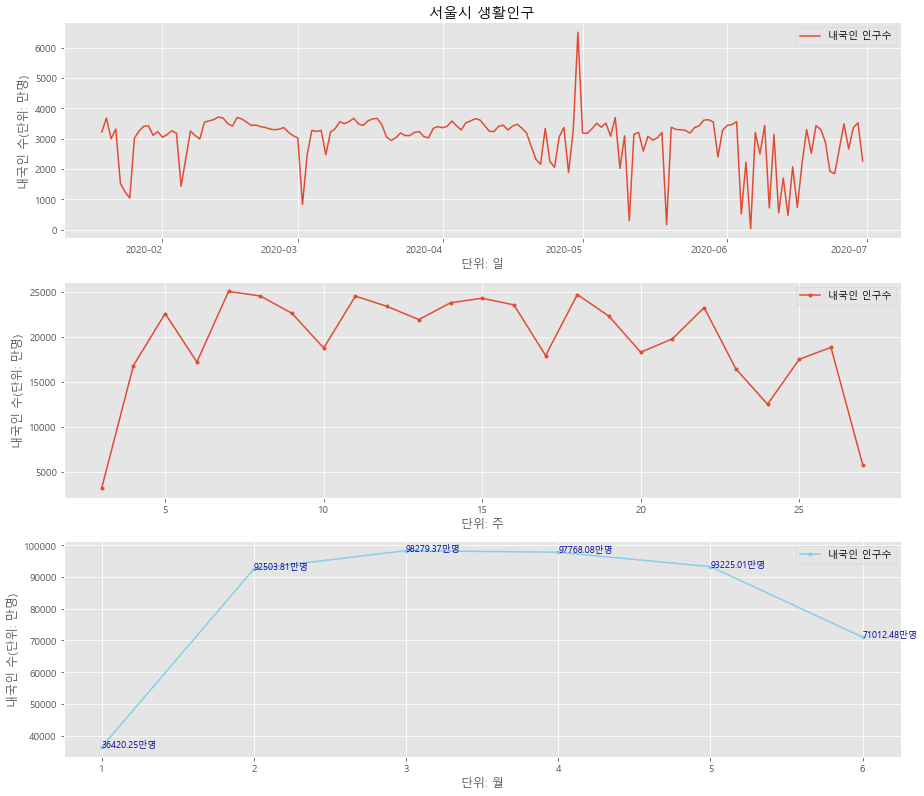

In [312]:
plt.style.use('ggplot')
f, ax = plt.subplots(3, 1, figsize=(15, 15))
date_pv.plot(kind='line', rot=0, ax=ax[0])
ax[0].set_title('서울시 생활인구')
ax[0].set_ylabel('내국인 수(단위: 만명)')
ax[0].set_xlabel('단위: 일')

date_pv_week.plot(kind='line', marker='.', ax=ax[1]) 
ax[1].set_ylabel('내국인 수(단위: 만명)')
ax[1].set_xlabel('단위: 주')

date_pv_month.plot(kind='line', color='skyblue', marker='.', ax=ax[2])
for i, value in enumerate(date_pv_month['내국인 인구수']):
    ax[2].text(i+1, value,
            '%s만명' % round(value, 2),
            fontsize=9, color='#000099',
            horizontalalignment='left',
            verticalalignment='baseline')
ax[2].set_ylabel('내국인 수(단위: 만명)')
ax[2].set_xlabel('단위: 월')

plt.show() 

* 1월의 데이터가 19일부터 31일까지만 존재하고, 생활인구 데이터가 전혀 존재하지 않았던 행정동도 있었습니다.
* 특정 날(구정 1월 24일, 석가탄신일 4월 30일)에 생활인구가 대폭 증감하는 것을 확인할 수 있었습니다.
* 이런 이유로 일별로 시각화하여 데이터를 분석하기 보다는 생활인구의 추이를 확인하는 것에 포커스를 맞추고 보다 큰 단위인 주별과 월별로 시각화했습니다.
* **코로나19** 이후 생활인구가 점차 감소하는 것을 확인했고, 코로나 확진자가 가장 많았던 **5월과 6월까지** 생활인구가 대폭 감소한 것을 확인했습니다.


## 2-4.  (주)에스나인에스의 행정동 데이터를 가져와 KT의 생활인구 데이터와 병합

- 생활인구데이터에는 행정시, 구, 동명이 존재하지 않기 때문에 이를 매핑해주는 작업이 필요했습니다.

In [ ]:
code_map = pd.read_csv('행정동_2021.csv', encoding='utf-8')
code_map.drop(['생성일자','말소일자'], axis=1, inplace=True)
code_map.columns = ['행정동코드', '시도', '시군구', '읍면동']
code_map['행정동코드'] = code_map['행정동코드'].astype(str)
code_map['행정동코드'] = code_map['행정동코드'].str[:-2]
cond = code_map['읍면동'].isnull()
code_map = code_map[~cond]

df['행정동코드'] = df['행정동코드'].astype(str)
df_mer = pd.merge(df, code_map, on='행정동코드', how='inner')

## 2-5. 생활인구를 서울시 **자치구별**로 구분

- 여기서 두 가지 질문을 던져볼 수 있을것 같습니다.
1) 어떤 자치구에 생활인구가 가장 많고 적을까?
2) 자치구별로 남녀의 생활인구는 어떤 차이가 있을까? 

In [ ]:
df_area = df_mer.pivot_table(index='시군구', values='내국인 인구수', aggfunc='sum')
df_area['내국인 인구수'] = df_area['내국인 인구수'] /10000
df_area = df_area.sort_values(by='내국인 인구수', ascending=True)

df_area_gen = df_mer.pivot_table(index='시군구', values='내국인 인구수', columns='성별',aggfunc='sum')
df_area_gen['합계'] = df_area_gen['F'] + df_area_gen['M']
df_area_gen = df_area_gen.sort_values(by='합계', ascending=True)
df_area_gen['F']  = df_area_gen['F'] / 10000
df_area_gen['M']  = df_area_gen['M'] / 10000 

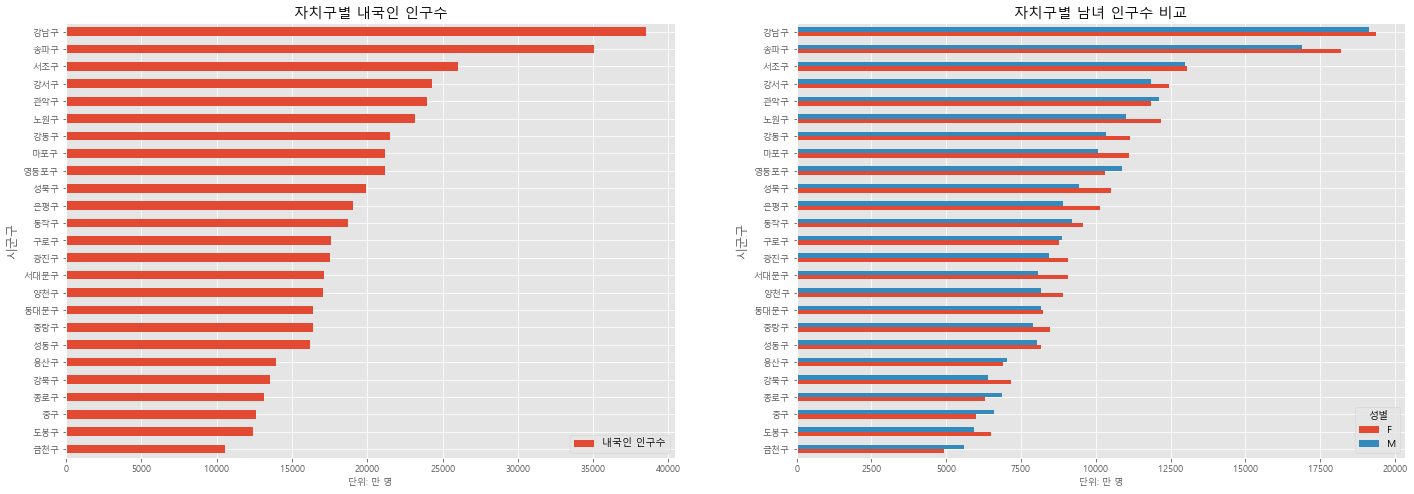

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(24, 8))
df_area.plot(kind='barh',rot=0, fontsize=9, ax=ax[0])
ax[0].set_title('자치구별 내국인 인구수')
ax[0].set_xlabel('단위: 만 명', fontsize=9)

df_area_gen.plot(kind='barh', y=['F','M'], rot=0, fontsize=9, ax=ax[1])
ax[1].set_title('자치구별 남녀 인구수 비교')
ax[1].set_xlabel('단위: 만 명', fontsize=9)

plt.show()

* 강남구와 송파구의 생활인구가 월등히 많았고, 금천구가 가장 적은 것을 확인했습니다.
* 비교적 여성의 생활인구가 남성보다 높았고 특정 구(관악구, 영등포구 등)에서는 남성의 생활인구가 높은 것을 알 수 있었습니다.

## 2-6. 생활인구 지도 시각화

- folium 라이브러리와 json파일 이용해 시각화를 진행했습니다.

In [ ]:
import json
import folium
geo_path = 'folium_seoul.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

from sklearn import preprocessing
df_area_norm = df_area.copy()
a = df_area_norm['내국인 인구수'].values
min_max_scaler = preprocessing.MinMaxScaler()
b = a.reshape(-1,1) #1차원 배열을 2차원 배열로 바꿔줌
b_scaled = min_max_scaler.fit_transform(b.astype(float))
df_area_norm.loc[:,'내국인 인구수'] = b_scaled

m = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11,
    tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=df_area_norm['내국인 인구수'],
    columns=[df_area_norm.index,df_area_norm['내국인 인구수']],
    fill_color='YlGnBu', #PuRd, YlGnBu, YlGn, YlOrRd

    key_on='feature.id',
    legend_name='정규화된 생활인구비').add_to(m)
m

* 분석결과, 강남지역이이 강북지역보다 생활인구가 많은 것을 확인했습니다.
* 도심생활권인 용산, 중구, 종로구 / 서남2생활권인 금천 / 동북2생활권인 강북, 도봉의 생활인구가 다른 지역보다 훨씬 적었습니다. 

## 2-7. 자치구별 생활인구를 월별로 비교

- scikit-learn의 MinMaxScaler를 이용하여 편차가 큰 데이터들을 정규화를 진행했습니다.
- 각 월에서 생활인구가 가장 많은 자치구를 Max(1), 적은 자치구를 Min(0)으로 설정하고 나머지 자치구의 데이터들을 0과 1사이의 수치로 표현했습니다.
- 1월은 데이터가 너무 적기 때문에 분석에서 제외했습니다.

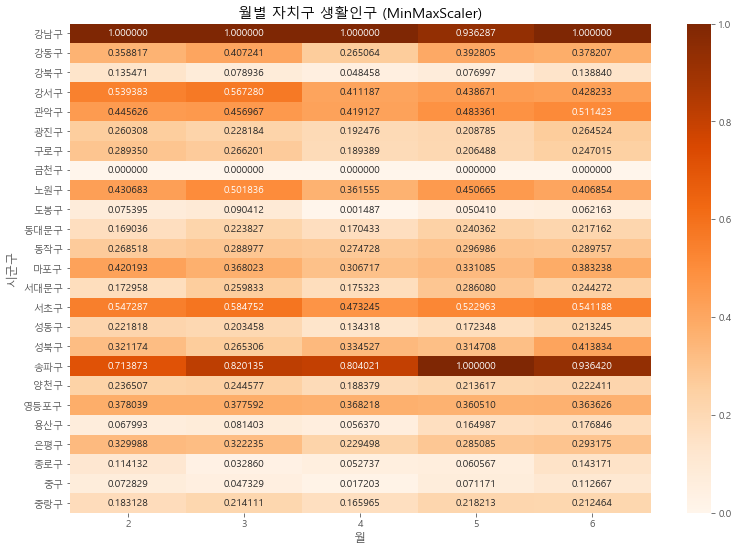

In [ ]:
df_month_area = df_mer.pivot_table(index='시군구', values='내국인 인구수', columns='월', aggfunc='sum')

df_month_area.drop([1], axis=1, inplace=True)
df_month_area_norm = df_month_area.copy()
columns = df_month_area_norm.columns.tolist()
x = df_month_area_norm[columns].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
df_month_area_norm.loc[:, columns] = x_scaled

plt.figure(figsize=(13, 9))
sns.heatmap(df_month_area_norm, annot=True, fmt='f', cmap='Oranges')
plt.title('월별 자치구 생활인구 (MinMaxScaler)')
plt.show()

* 2월부터 6월까지 강남구와 송파구의 생활인구 수가 부동의 1, 2위였습니다.
* 금천구는 2월부터 6월까지 가장 생황인구가 적었습니다(자치구별 배달순위는 2위).
* 배달이 많은 순으로 상위 5위였던 구로구, 금천구, 영등포구, 도봉구, 은평구는 다른 자치구보다 생활인구가 적었던 것을 확인할 수 있었습니다.

## 생활인구 데이터를 분석하면서 느낀 문제점과 및 한계점
#### - 연령대별로 데이터를 분석하고 싶었지만, 연령대 70세 이상의 모든 데이터가 2개씩 중복되어 다른 연령대에 비해 2배씩 크게 나왔습니다. 때문에 연령대별 생활인구 비교 분석은 제외했습니다.
#### - 어떤 날짜에는 특정 행정동의 생활인구 데이터가 없었습니다. 때문에 동별로 분석을 하지 않고 큰 범위인 자치구별로 데이터를 분류하여 분석했습니다.
#### - 코로나19 이전의 데이터가 존재하지 않아 코로나19 바이러스 전후 비교 분석을 하지 못했습니다. 2020년 2월부터 확진자가 나오기 시작했음에도 불구하고 그나마 받은 2020년 1월 데이터마저 19일부터 31일까지만 있었습니다.
#### - 이런 이유들로 확진자가 급격하게 많아진 5월을 생각하여 생활인구 추이를 분석하는 정도만 할 수 있었습니다 

# 3. StartupOrClosing_Shop_ver2.csv 데이터 시각화

## 데이터 불러오기

In [25]:
startup_shop = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_Shop_ver2.csv',encoding="utf-8",low_memory=False)

startup_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101784 entries, 0 to 101783
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   No            101784 non-null  int64 
 1   DATE          101784 non-null  int64 
 2   INDUTY_NM     101784 non-null  object
 3   CMPNM         101783 non-null  object
 4   INDUTY_CODEM  101784 non-null  int64 
 5   division      101784 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.7+ MB


In [26]:
startup_shop.isnull().sum() # 널값 확인 후 해당 널값이 이후 데이터 처리상 영향을 미치지 못하는 널값으로 확인하여 해당 널값은 신경을 안쓰고 진행합니다.

No              0
DATE            0
INDUTY_NM       0
CMPNM           1
INDUTY_CODEM    0
division        0
dtype: int64

### 업종/상호별 창업 폐업 유츄 데이터 전체 중 창업 폐업의 비율

가정 : 코로나가 우리나라에 시작된 기간의 데이터의 창업의 비율은 페업의 비율보다 작을 것으로 생각합니다.

[11772, 90012]


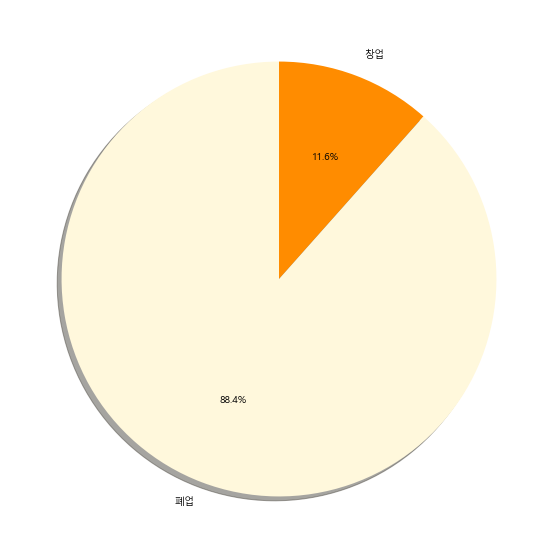

In [27]:
division_1 = startup_shop['division'] == 1   # 창폐업 구분이 1과 0으로 구분되어 있는 데이터를 각각 구분하여 이를 새로 저장하고 해당 창폐업을 파이그래프로 표현하였습니다.
division_0 = startup_shop['division'] == 0

subset_df1 = startup_shop[division_1] 
subset_df0 = startup_shop[division_0]
f1 = []
f1.append(len(subset_df1))
f1.append(len(subset_df0))
print(f1)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f1,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 
코로나 이후 창업의 비율이 **11.6%** 폐업의 비율이 **88.4%** 를 차지하고 있는 모습을 확인할 수 있습니다. 
하지만 이러한 모습은 코로나의 문제라고만 설명하기에는 많은 변수들이 있다고 생각합니다.

대표적으로 많은 사람들이 도전하는 요식업의 하나인 치킨의 경우 3년에서 5년 정도에 수많은 업장들이 폐업을 한다고 합니다. 
따라서 이렇게 폐업의 비율은 특정 기간에 폐업한 경우라고 하지만 다른 추가적인 변수의 영향도 있을 것으로 생각됩니다.

출처 : [뉴스](https://www.mk.co.kr/news/society/view/2021/07/729566/)

### 업종/상호별 창업 폐업 유츄 데이터 전체 중 월별 창업 폐업

가정 : 우리나라의 코로나의 위기의식이 심해진 대구 코로나 상황을 본 데이터가 가지고 있어 대구 코로나가 확진이 시작된 2월을 기준으로 폐업률을 더욱 빠르게 높아질 것으로 생각하였습니다.

[166, 0, 0, 0, 0, 11606] [123, 127, 108, 101, 70205, 19348]


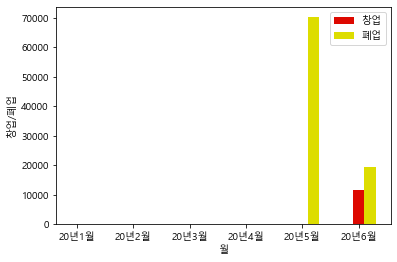

In [28]:
startup_shop['DATE']= startup_shop['DATE'].astype('str')
startup_shop['DATE']=startup_shop['DATE'].apply(lambda _ : datetime.strptime(_,'%Y%m%d')) # Datetime 형태로 변환하여 시간별로 창업 폐업의 모습을 확인하기 위해 해당 데이터를 진행하였습니다.
start_up_shop_filter1 = startup_shop.loc[startup_shop['division'] == 1]
start_up_shop_filter0 = startup_shop.loc[startup_shop['division'] == 0]
start_up_shop_filter1.index = start_up_shop_filter1['DATE']
start_up_shop_filter0.index = start_up_shop_filter0['DATE']
monthly_df_1 = start_up_shop_filter1.resample('M')['division'].count()                    # division 별로 각 월을 카운트 하여 각 저장하고 바 그래프를 그려보았습니다.
monthly_df_0 = start_up_shop_filter0.resample('M')['division'].count()



label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]


x = np.arange(len(label))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0800')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')


print(f1 , f2)
plt.show()

결과 : 
창폐업의 데이터가 특정한 달에 몰려 있고 f1 값인 창업의 값은 20년 2월부터 0의 수치가 있는 것과 f2의 값도 5월에 7만건 가량 폐업이 잡히는 모습으로 보아 해당 데이터를 활용하여 월별 창업 폐업의 비율 등 다양한 시각화를 하는 것은 부적합하다고 생각하였습니다.

이후 외부데이터를 활용하여 해당 데이터의 신뢰성을 분석한 결과 
중소벤처기업부의 [보도자료](https://www.k-startup.go.kr/common/post/detail.do?mid=30005&bid=710&postSn=129149)를 확인한 결과 제공받은 데이터는 전체를 포함하지 않고 부적합한 데이터라고 판단하여 데이터가 무엇을 의미하고 싶은 의미만을 파악하는 것에 초점을 두고 생각하기로 하였습니다.

## 요식산업 관련 데이터 

이유 : 

StartupOrClosing_Shop의 데이터의 업종명의 분류가 요식업 관련이 아닌 모든 산업 업종으로 분류가 되어 있어 우선적으로 요식업 관련 업종으로 엑셀을 활용하여 전처리 작업을 하였습니다. 

중복값 제거를 활용하여 전체 데이터 중 음식 관련 데이터를 하나씩 분석하여 TXT 음식산업 인덱스를 만들어 해당 음식 산업을 새로 음식산업 관련 파일로 만들어 이후 요식업 관련 데이터만 따로 확인 할 수 있도록 전처리 작업을 진행하였습니다.

In [29]:
# 일일이 엑셀로 중복값 제거하고 하나씩 확인 후 요식업 관련 업종명만 추출 총 190개의 요식업 산업만 분류하였습니다
txt = '''갈비탕
감자탕
감자튀김
개.염소.양고기도매
건어물상
게요리
고기부페
고래고기
곰탕
곱창.양구이
과일주스전문점
관광음식점
국수
굴요리
기사식당
김밥
김치
꽈배기전문
꿩고기
낙지요리
냉면
다방
다슬기요리
닭갈비
닭강정
닭발
닭요리
대구탕
도너츠
도시락
돈가스
동남아음식
돼지갈비
돼지국밥
두부요리
떡.한과
떡갈비
떡볶이
떡집
라면
로바다야끼
막국수
막창
만두
말고기
매운탕
머릿고기
메밀요리
멕시코요리
멧돼지고기
문어요리
문화카페
민속주점
밀면
바닷가재요리
반찬가게
백숙
버섯요리
베트남음식
보리밥
보리빵
복어요리
부대찌개
부페
분식
불닭
브라질요리
브런치카페
비빕밥
빙과류도매
빵.과자
사찰음식점
사철.영양탕
삼겹살
삼계탕
샌드위치
샐러드전문점
샤브샤브
샤브샤브부페
설렁탕
소고기국밥
소머리국밥
수제맥주
수제파이
순대.순대국
순대국밥
순두부
스테이크
스파게티
스페인요리
시락국밥
쌈밥
아귀요리
아이스크림
야식
양고기
양식
어죽
어탕
연어전문
오뎅바
오리고기
오리요리
오메기떡판매
오징어요리
와플전문점
우동
육개장전문
육류.고기요리
육류가공
음식점-고로케전문
음식점-닭요리전문
음식점-돌잔치부페
음식점-마라탕
음식점-연탄구이전문
음식점-차돌박이전문
음식점-츄러스
이탈리아요리
인도음식
인삼제품
일식
일식튀김.꼬치
장어
전.빈대떡.부침
전복요리
전통찻집
젓갈판매
정육점
제과점
제사음식
조개구이
족발.보쌈
주먹밥
죽전문점
중국음식
쭈꾸미요리
찌개.전골
찜닭
참기름
참치요리
채소가게
채식부페
철판구이
청과물
초밥.롤
초밥부페
추어탕
출장요리
치킨
카레
카페
카페-디저트
카페-힐링
칼국수
커피가공
케이크전문점
코다리전문
콩국수
콩나물국밥
콩요리
태국음식
토끼고기
토스트
패스트푸드(종합)
편의점
포장마차
푸드트럭
퓨전음식
프랑스요리
프랜차이즈
피자
한식
한식배달
한식부페
한우고기
한정식
핫도그
해물.생선요리
해물부페
해장국
햄버거
호두과자
호떡
호프
홍어
화덕피자전문
횟집
흑돼지
흑염소'''

startup_shop = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_Shop_ver2.csv',low_memory=False)

categoryList=txt.split("\n")   # txt를 \n로 나눠 하나의 카테고리 리스트로 변환

dlvr_category=[]
for i in categoryList:    # for 문을 활용하여 각 카테고리 별 csv 파일로 변환 후 특정 폴더에 저장
    dlvr_category1 = startup_shop.loc[startup_shop['INDUTY_NM'] == i]
    dlvr_category1.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup\\' + str(i) +'.csv')


# 음식점-생태/동태/명태요리전문 해당 업종명은 for 문을 실행하는 당시 오류가 있어 따로 확인 후 같이 저장
dlvr_category1 = startup_shop.loc[startup_shop['INDUTY_NM'] == '음식점-생태/동태/명태요리전문']
dlvr_category1.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup\\생태.동태.명태요리.csv')


import os  # csv 파일로 만들어진 파일을 모두 불러 온 후 하나의 데이터 프레임으로 변환 하고 이를 앞으로 활용할 데이터 파일로 변환하기 위해 새로 저장

path = 'C:\\code\\ktbigdatacode\\데이터 인사이트\\startup\\'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] 
file_list_py

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i)
    df = pd.concat([df,data])
    
start_up_shop_food = df.reset_index(drop = True)
start_up_shop_food=start_up_shop_food[['DATE','INDUTY_NM','CMPNM','INDUTY_CODEM','division']]
start_up_shop_food.dropna(inplace=True)
start_up_shop_food.to_csv('C:/code/ktbigdatacode/데이터 인사이트/shop음식관련.csv',encoding='utf-8-sig')  

### 이후 TXT로 정의한 요식업 관련 업종명에서 음식관련 데이터를 만들어 전체 데이터 중 음식관련 업종의 시각화를 진행합니다

In [30]:
startup_shop_food = pd.read_csv('C:/code/ktbigdatacode/데이터 인사이트/shop음식관련.csv',encoding="utf-8",low_memory=False)
startup_shop_food.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17762 entries, 0 to 17761
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    17762 non-null  int64 
 1   DATE          17762 non-null  int64 
 2   INDUTY_NM     17762 non-null  object
 3   CMPNM         17762 non-null  object
 4   INDUTY_CODEM  17762 non-null  int64 
 5   division      17762 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 832.7+ KB


In [31]:
startup_shop_food.isnull().sum()    # 음식관련 데이터는 널값이 나오지 않아 다른 처리가 필요하지 않을 것으로 보입니다.

Unnamed: 0      0
DATE            0
INDUTY_NM       0
CMPNM           0
INDUTY_CODEM    0
division        0
dtype: int64

## 3-1. 요식업 관련 데이터의 창업과 폐업

가정 : 
요식업은 전체 산업의 창업보다 더욱 접근성이 좋아 많은 창업의 비율이 조금은 높아질 것이다. 

출처 :[뉴스](https://www.mk.co.kr/news/economy/view/2020/05/512515/)

[3241, 14521]


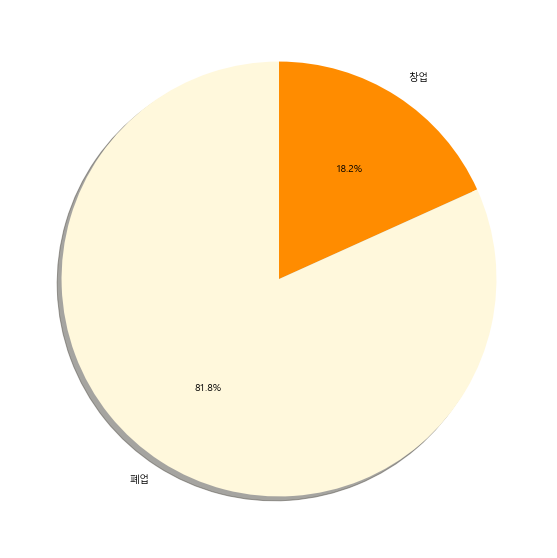

In [32]:
division_1 = startup_shop_food['division'] == 1  # 음식업 데이터의 division의 1과 0을 구분하여 창업과 폐업의 그래프로 파이그래프를 활용하였습니다.
division_0 = startup_shop_food['division'] == 0

subset_df1 = startup_shop_food[division_1] 
subset_df0 = startup_shop_food[division_0]
f1 = []
f1.append(len(subset_df1))
f1.append(len(subset_df0))
print(f1)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f1,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 
창업이 **18.2%** 폐업이 **81.8%** 로 요식업의 창업은 전체산업의 측면에서 보면 많이 증가한 모습을 보여주었습니다. 하지만 여전히 폐업의 비중이 큰 모습으로 보여집니다. 
하지만 이러한 모습은 코로나의 문제라고만 설명하기에는 많은 변수들이 있다고 생각합니다.


대표적으로 많은 사람들이 도전하는 요식업의 하나인 치킨의 경우 3년에서 5년 정도에 수많은 업장들이 폐업을 한다고 합니다.
따라서 이렇게 폐업의 비율은 특정 기간에 폐업한 경우라고 하지만 다른 추가적인 변수의 영향도 있을 것으로 생각됩니다.

출처 : [뉴스](https://www.mk.co.kr/news/society/view/2021/07/729566/)

## 3-2. 요식업 관련 데이터 월별 창업 폐업

가정 : 코로나의 확진이 시작된 대구 2월을 기준으로 하여 폐업의 수는 많아 질 것으로 생각 해 볼 수 있고 특히 요식업의 폐업은 점점 증가하는 모습의 그래프를 보일 것으로 예측

[10, 0, 0, 0, 0, 3231] [24, 24, 14, 12, 10562, 3885]


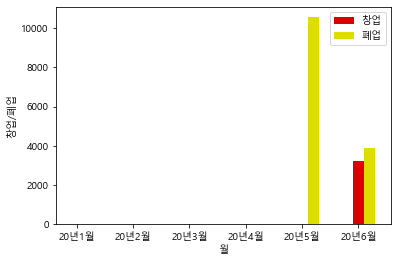

In [33]:
startup_shop_food['DATE']= startup_shop_food['DATE'].astype('str')
startup_shop_food['DATE']=startup_shop_food['DATE'].apply(lambda _ : datetime.strptime(_,'%Y%m%d')) # Datetime 형태로 변환하여 월별 창업 폐업의 데이터를 저장하였습니다.
startup_shop_test_filter1 = startup_shop_food.loc[startup_shop_food['division'] == 1]
startup_shop_test_filter0 = startup_shop_food.loc[startup_shop_food['division'] == 0]
startup_shop_test_filter1.index = startup_shop_test_filter1['DATE']
startup_shop_test_filter0.index = startup_shop_test_filter0['DATE']
monthly_df_1 = startup_shop_test_filter1.resample('M')['division'].count()
monthly_df_0 = startup_shop_test_filter0.resample('M')['division'].count()


label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]
x = np.arange(len(label))
print(f1, f2)


plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0000')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

본 데이터도 기존의 데이터가 이미 5월에 많은 데이터로 몰려 있는 모습이 있어 해당 데이터가 없는 것으로 판단하였습니다.
또한 5월 29일에 수많은 데이터가 몰려 있는 데이터의 특성상 특정 월별 데이터를 가지고 해당 월에 어느정도의 산업이 폐업하고 창업하였는지 데이터를 명확하게 확인하기에 데이터가 많이 부족하였습니다.

이번 과정을 통해 만약 데이터가 데이터가 생성된 날짜가 아닌 폐업한 날짜 혹은 폐업신청을 한 날짜의 데이터가 있었으면 더욱 좋은 관점을 제시할 수 있었을 것이라 생각하니 데이터가 많이 아쉬웠습니다.
또 해당 데이터의 범위가 전국인지 서울인지 특정 지역인지 알 수 없어 명확한 구분을 하지 못하였으나 전국 혹은 서울의 데이터라고 판단하고 데이터를 바라본 결과 우리마을가게 상권분석의 외식업의 개폐업수랑 본 데이터를 같이 확인한 결과 동일기간인 6개월 간의 창업과 폐업의 수의 차이가 있는 것으로 확인되어 이런 데이터의 확인도 필요할 것이라고 생각하였습니다.

만약 본 데이터가 특정 지역의 산업의 모습이라고 언급이 되어 있거나 해당 특정 지역의 수라고 언급이 되어 있으면 조금 더 지역적인 시각에서의 새로운 관점을 제시할 수 있었을 것이라 생각합니다.


# 4. StartupOrClosing_Region_ver2.csv 데이터 시각화

## 전처리

In [34]:
startup_region = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_Region_ver2.csv',low_memory=False)

startup_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67257 entries, 0 to 67256
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INDEX               67257 non-null  int64 
 1   DATE                67257 non-null  int64 
 2   INDUTY_NM           67257 non-null  object
 3   BRTC_NM             67257 non-null  object
 4   SIGUNGU_NM          67257 non-null  object
 5   EMD                 67257 non-null  object
 6   LA_DCMLPOINT_VALUE  67257 non-null  object
 7   LO_DCMLPOINT_VALUE  67257 non-null  object
 8   DIVISION            67257 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [35]:
startup_region.isnull().sum()

INDEX                 0
DATE                  0
INDUTY_NM             0
BRTC_NM               0
SIGUNGU_NM            0
EMD                   0
LA_DCMLPOINT_VALUE    0
LO_DCMLPOINT_VALUE    0
DIVISION              0
dtype: int64

## 4-1. 스타트업 업종/지역별 창업폐업 데이터 속 창업과 폐업의 비율

가정 : 

위의 스타트업 업종/상호별 데이터와 같은 데이터의 제공처에서 제공해준 데이터라 창업과 폐업의 비율이 비슷할 것이라고 생각하였습니다.

[1724, 65533]


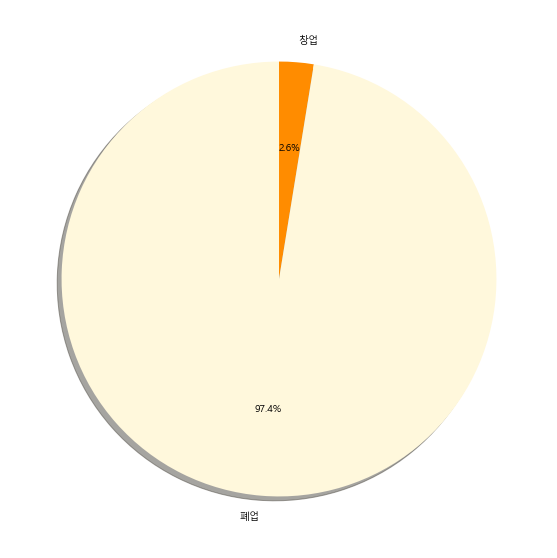

In [36]:
f3 = [startup_region['DIVISION'].value_counts()[1],startup_region['DIVISION'].value_counts()[0]]
print(f3)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f3,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 지역별로 나누어진 데이터 속 창업과 폐업의 비율이 극심하게 차이가 나는 모습을 보여주었습니다.

 창업의 비율이 전체 산업중에 **2.6%** 폐업의 비율이 **97.4%** 로 설명됩니다. 스타트업 관련 창업폐업 데이터를 같은 기관에서 제공받았지만 두 데이터 간의 이렇게 큰 격차가 있는 이유를 판단하기에 데이터에 주어진 정보가 많이 없습니다.



## 4-2. 스타트업 업종 / 지역별 창업 폐업 데이터 속 월별 창업 폐업 비율

가정 : 
지역별 창업 폐업 데이터도 전체로 확인하면 우리나라에 코로나가 심해진 2월을 기준으로 점점 우상향 하는 모습의 증가하는 모습이 보일 것으로 생각하였습니다.

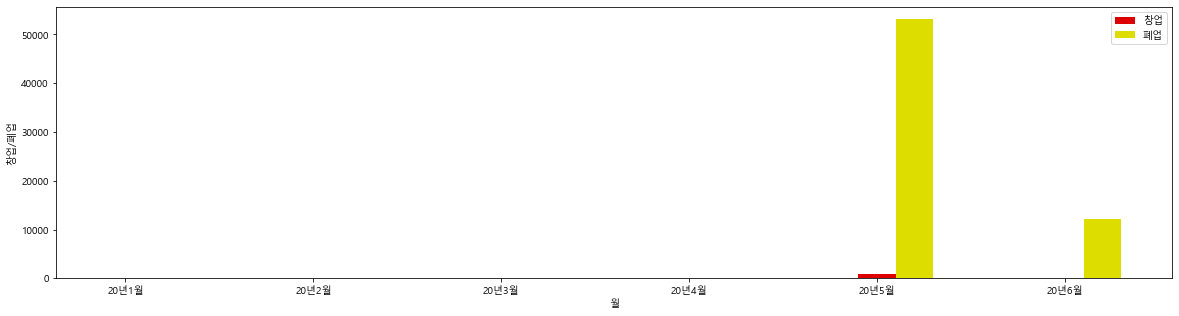

In [37]:
startup_region['DATE']= startup_region['DATE'].astype('str')
startup_region['DATE']=startup_region['DATE'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))
startup_region_test_filter1 = startup_region.loc[startup_region['DIVISION'] == 1]
startup_region_test_filter0 = startup_region.loc[startup_region['DIVISION'] == 0]
startup_region_test_filter1.index = startup_region_test_filter1['DATE']
startup_region_test_filter0.index = startup_region_test_filter0['DATE']
monthly_df_1 = startup_region_test_filter1.resample('M')['DIVISION'].count()
monthly_df_0 = startup_region_test_filter0.resample('M')['DIVISION'].count()

label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]
x = np.arange(len(label))
# print(f2)
plt.figure(figsize=(20,5))

plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0000')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()



결과 : 
스타트업 업종/상호별 창업폐업 데이터와 같은 기관에서 제공한 데이터라 데이터가 생성된 날짜로 데이터가 몰려 있어 5월에 데이터가 많이 몰려 있는 모습을 보여주었습니다.

데이터가 생성된 날짜가 아닌 폐업의 날짜 혹은 폐업신청의 날짜 그리고 창업은 해당 기간에 창업으로 구분되어지지만 폐업은 기존의 많은 업종 중 해당 기간에 폐업을 하는 모습이라 전반적인 비율이 적을 것으로 생각되어 데이터가 만약 필요하면 스타트업의 운영기간과 같은 세부적인 데이터가 있으면 더욱 효과적인 관점에서 다양한 시각화를 할 수 있을 것이라고 생각하였습니다.


## 4-3. 스타트업 업종/지역별 창업폐업 데이터 속 지역별 창업 폐업 비율

가정 : 
월별 데이터의 변화를 확인할 수 없어서 다음으로 분류 할 수 있는 지역별 데이터를 확인하였습니다. 폐업의 비율이 대구의 코로나 관련 이슈 중 지역사회 확산 방지 대책을 실시하여 대구 지역의 유동인구를 줄였기 때문에 대구지역의 폐업률의 변화가 있었을 것으로 예상하였습니다.

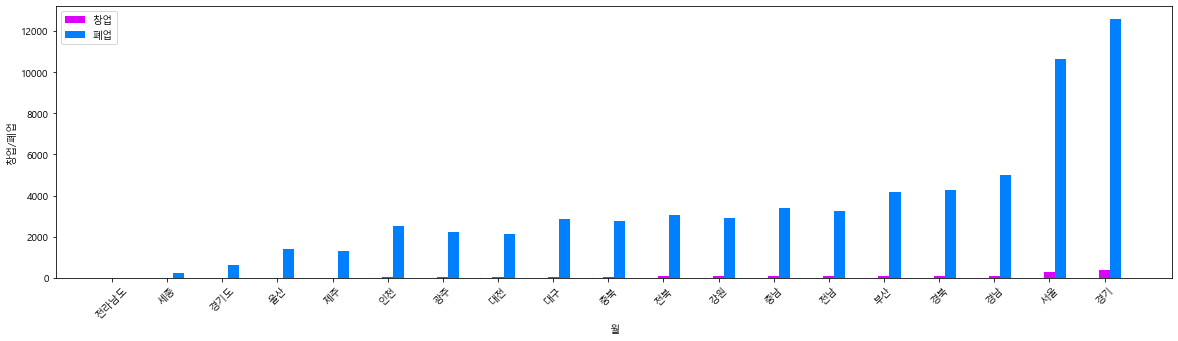

In [38]:
kor_do = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']
f1 = []
f2 = []
dlvr_category=[]
for i in kor_do:
    dlvr_category1 = startup_region['BRTC_NM'] == i
    division_1 = startup_region['DIVISION'] == 1
    division_0 = startup_region['DIVISION'] == 0
    subset_df1 = startup_region[dlvr_category1 & division_1] 
    subset_df0 = startup_region[dlvr_category1 & division_0]
    f1.append(len(subset_df1))
    f2.append(len(subset_df0))

label = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']

x = np.arange(len(label))
plt.figure(figsize=(20,5))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd00ff')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#0080ff')
plt.xticks(x,label,rotation=45)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

전국의 데이터가 지역별로 나누어진 데이터였습니다. 따라서 광역시도명 명칭으로 우선적으로 창업과 폐업의 비율을 확인하였고 서울과 경기 즉 수도권의 창업과 폐업이 많다는 내용을 확인하였습니다. 해당 데이터는 비율을 활용하여야 역할이 있을 것이라 생각하였지만 이미 기존의 제공받은 데이터속 정보가 많이 치우친 모습을 보여 비율을 확인하는 단계는 진행하지 않았습니다.

따라서 대구의 변화의 모습은 본 데이터가 5월에 많은 데이터가 몰려 있는 데이터라 변화량의 확인은 어려운 모습을 보여주었습니다.

## 4-4. 요식산업 관련 데이터 

이유 : 

StartupOrClosing_Region의 데이터의 업종명의 분류가 요식업 관련이 아닌 모든 산업 업종으로 분류가 되어 있어 우선적으로 요식업 관련 업종으로 엑셀을 활용하여 전처리 작업을 하였습니다. 

중복값 제거를 활용하여 전체 데이터 중 음식 관련 데이터를 하나씩 분석하여 TXT 음식산업 인덱스를 만들어 해당 음식 산업을 새로 음식산업 관련 파일로 만들어 이후 요식업 관련 데이터만 따로 확인 할 수 있도록 전처리 작업을 진행하였습니다.

In [39]:
startup_region = pd.read_csv('C:/code/ktbigdatacode/StartupOrClosing_region_ver2.csv',low_memory=False)

categoryList=txt.split("\n")   # txt를 \n로 나눠 하나의 카테고리 리스트로 변환

dlvr_category=[]
for i in categoryList:    # for 문을 활용하여 각 카테고리 별 csv 파일로 변환 후 특정 폴더에 저장
    dlvr_category2 = startup_region.loc[startup_region['INDUTY_NM'] == i]
    dlvr_category2.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup_region\\' + str(i) +'.csv')


# 음식점-생태/동태/명태요리전문 해당 업종명은 for 문을 실행하는 당시 오류가 있어 따로 확인 후 같이 저장
dlvr_category2 = startup_region.loc[startup_region['INDUTY_NM'] == '음식점-생태/동태/명태요리전문']
dlvr_category2.to_csv('C:\\code\\ktbigdatacode\\데이터 인사이트\\startup_region\\생태.동태.명태요리.csv')


import os  # csv 파일로 만들어진 파일을 모두 불러 온 후 하나의 데이터 프레임으로 변환 하고 이를 앞으로 활용할 데이터 파일로 변환하기 위해 새로 저장

path = 'C:\\code\\ktbigdatacode\\데이터 인사이트\\startup_region\\'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] 
file_list_py

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i)
    df = pd.concat([df,data])
    
start_up_region_food = df.reset_index(drop = True)
start_up_region_food=start_up_region_food[['DATE','INDUTY_NM','BRTC_NM','SIGUNGU_NM','EMD','LA_DCMLPOINT_VALUE','LO_DCMLPOINT_VALUE','DIVISION']]
start_up_region_food.dropna(inplace=True)
start_up_region_food.to_csv('C:/code/ktbigdatacode/데이터 인사이트/region음식관련.csv',encoding='utf-8-sig')  

### TXT로 정의한 요식업 관련 업종명에서 음식관련 데이터를 만들어 해당 전체 데이터 중 음식관련 업종의 시각화를 진행합니다

In [40]:
startup_region_food = pd.read_csv('C:/code/ktbigdatacode/데이터 인사이트/region음식관련.csv',encoding="utf-8",low_memory=False)
startup_region_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11326 non-null  int64 
 1   DATE                11326 non-null  object
 2   INDUTY_NM           11326 non-null  object
 3   BRTC_NM             11326 non-null  object
 4   SIGUNGU_NM          11326 non-null  object
 5   EMD                 11326 non-null  object
 6   LA_DCMLPOINT_VALUE  11326 non-null  object
 7   LO_DCMLPOINT_VALUE  11326 non-null  object
 8   DIVISION            11326 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 796.5+ KB


In [41]:
startup_region_food.isnull().sum() 

Unnamed: 0            0
DATE                  0
INDUTY_NM             0
BRTC_NM               0
SIGUNGU_NM            0
EMD                   0
LA_DCMLPOINT_VALUE    0
LO_DCMLPOINT_VALUE    0
DIVISION              0
dtype: int64

## 4-5. 요식업 관련 지역데이터의 창업과 폐업

가정 : 
요식업은 전체 산업의 창업보다 더욱 접근성이 좋아 많은 창업의 비율이 조금은 높아질 것이다. 

출처 : [뉴스](https://www.mk.co.kr/news/economy/view/2020/05/512515/)

[410, 10916]


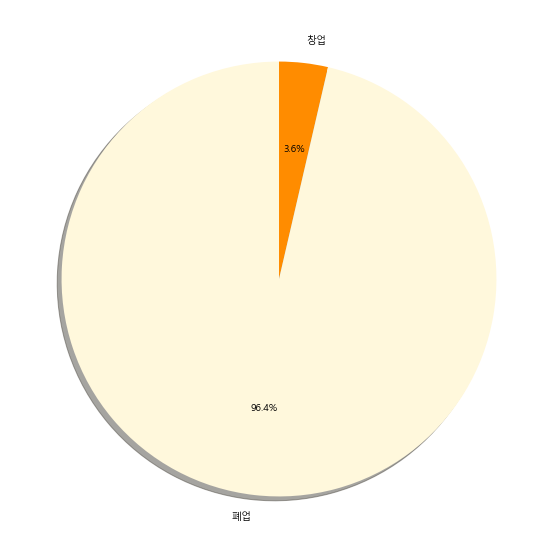

In [42]:
f3 = [startup_region_food['DIVISION'].value_counts()[1],startup_region_food['DIVISION'].value_counts()[0]]
print(f3)
explode_value=(0,0)
name_pie = ['창업','폐업']
col=['darkorange','cornsilk']


plt.figure(figsize=(10,10))
plt.pie(f3,labels=name_pie,autopct='%0.1f%%',startangle=90,explode=explode_value,shadow=True,colors=col,counterclock=False)

plt.show()

결과 : 
창업의 비율은 **3.8%** 폐업의 비율은 **96.2%** 의 모습을 보여주었습니다.


요식업의 창업은 전체산업의 측면에서 보면 많이 증가한 모습을 보여주었습니다. 하지만 여전히 폐업의 비중이 큰 모습으로 보여집니다. 
하지만 이러한 모습은 코로나의 문제라고만 설명하기에는 많은 변수들이 있다고 생각합니다.


대표적으로 많은 사람들이 도전하는 요식업의 하나인 치킨의 경우 3년에서 5년 정도에 수많은 업장들이 폐업을 한다고 합니다.
따라서 이렇게 폐업의 비율은 특정 기간에 폐업한 경우라고 하지만 다른 추가적인 변수의 영향도 있을 것으로 생각됩니다.

출처 : [뉴스](https://www.mk.co.kr/news/society/view/2021/07/729566/)

## 4-6 . 요식업 관련 지역데이터 월별 창업 폐업


가정 : 코로나의 확진이 시작된 대구 2월을 기준으로 하여 폐업의 수는 많아 질 것으로 생각 해 볼 수 있고, 특히 요식업의 폐업은 점점 증가하는 모습의 그래프를 보일 것으로 예측했습니다.

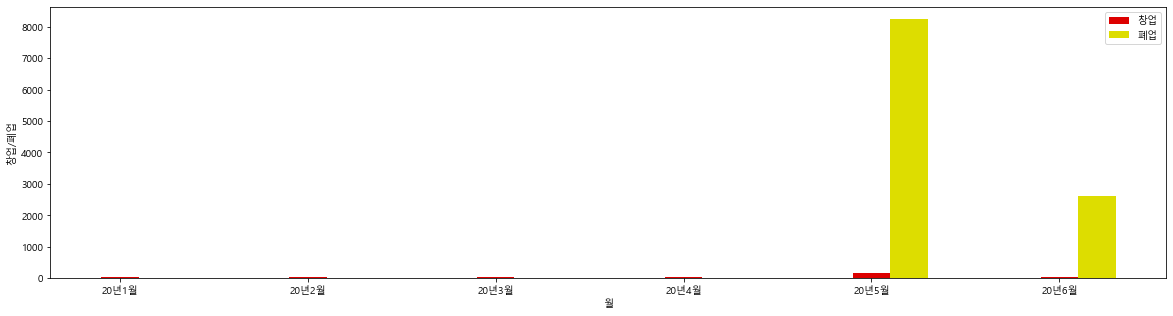

In [43]:

startup_region_food['DATE']= startup_region_food['DATE'].astype('str')
startup_region_food['DATE']=startup_region_food['DATE'].apply(lambda _ : datetime.strptime(_,'%Y-%m-%d'))
startup_region_test_filter1 = startup_region_food.loc[startup_region_food['DIVISION'] == 1]
startup_region_test_filter0 = startup_region_food.loc[startup_region_food['DIVISION'] == 0]
startup_region_test_filter1.index = startup_region_test_filter1['DATE']
startup_region_test_filter0.index = startup_region_test_filter0['DATE']
monthly_df_1 = startup_region_test_filter1.resample('M')['DIVISION'].count()
monthly_df_0 = startup_region_test_filter0.resample('M')['DIVISION'].count()


label = ['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월']
f1 = [x for x in monthly_df_1 ]
f2 = [x for x in monthly_df_0 ]
x = np.arange(len(label))

plt.figure(figsize=(20,5))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd0000')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#dddd00')
plt.xticks(x,label)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

본 데이터도 기존의 데이터가 이미 5월에 많은 데이터로 몰려 있는 모습이 있어 해당 데이터가 없는 것으로 판단하였습니다.
또한 5월 29일에 수많은 데이터가 몰려 있는 데이터의 특성상 특정 월별 데이터를 가지고 해당 월에 어느정도의 산업이 폐업하고 창업하였는지 데이터를 명확하게 확인하기에 데이터가 많이 부족하였습니다.

이번 과정을 통해 만약 데이터가 데이터가 생성된 날짜가 아닌 폐업한 날짜 혹은 폐업신청을 한 날짜의 데이터가 있었으면 더욱 좋은 관점을 제시할 수 있었을 것이라 생각하니 데이터가 많이 아쉬웠습니다.
또 해당 데이터의 범위가 전국인지 서울인지 특정 지역인지 알 수 없어 명확한 구분을 하지 못하였으나 전국 혹은 서울의 데이터라고 판단하고 데이터를 바라본 결과 우리마을가게 상권분석의 외식업의 개폐업수랑 본 데이터를 같이 확인한 결과 동일기간인 6개월 간의 창업과 폐업의 수의 차이가 있는 것으로 확인되어 이런 데이터의 확인도 필요할 것이라고 생각하였습니다.

만약 본 데이터가 특정 지역의 산업의 모습이라고 언급이 되어 있거나 해당 특정 지역의 수라고 언급이 되어 있으면 조금 더 지역적인 시각에서의 새로운 관점을 제시할 수 있었을 것이라 생각합니다.


## 4-6. 요식업 관련 데이터 지역별 창업 폐업

가정 :
월별 데이터의 변화를 확인할 수 없어서 다음으로 분류 할 수 있는 지역별 데이터를 확인하였습니다. 폐업의 비율이 대구의 코로나 관련 이슈 중 지역사회 확산 방지 대책을 실시하여 대구 지역의 유동인구를 줄였기 때문에 대구지역의 폐업률의 변화가 있었을 것으로 예상하였습니다.

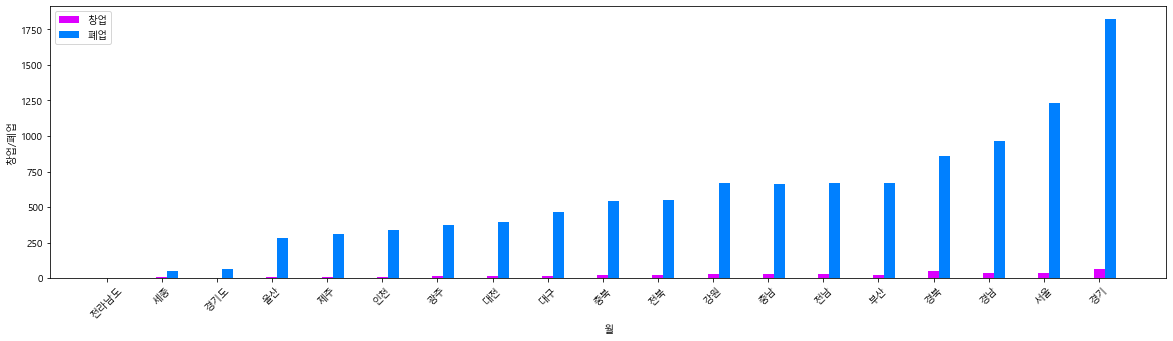

In [44]:
kor_do = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']
f1 = []
f2 = []
dlvr_category=[]
for i in kor_do:
    dlvr_category1 = startup_region_food['BRTC_NM'] == i
    division_1 = startup_region_food['DIVISION'] == 1
    division_0 = startup_region_food['DIVISION'] == 0
    subset_df1 = startup_region_food[dlvr_category1 & division_1] 
    subset_df0 = startup_region_food[dlvr_category1 & division_0]
    f1.append(len(subset_df1))
    f2.append(len(subset_df0))

label = ['전라남도','세종','경기도','울산','제주','인천','광주','대전','대구','충북','전북','강원','충남','전남','부산','경북','경남','서울','경기']

x = np.arange(len(label))
plt.figure(figsize=(20,5))
plt.bar(x-0.0,f1,label='창업',width=0.2,color='#dd00ff')
plt.bar(x+0.2,f2,label='폐업',width=0.2,color='#0080ff')
plt.xticks(x,label,rotation=45)


plt.legend()
plt.xlabel('월')
plt.ylabel('창업/폐업')

plt.show()

결과 : 

전국의 데이터가 지역별로 나누어진 데이터였습니다. 따라서 광역시도명 명칭으로 우선적으로 요식업으로 분류한 데이터를 창업과 폐업의 비율을 확인하였고 서울과 경기 즉 수도권의 요식업의 창업과 폐업이 많다는 내용을 확인하였습니다. 해당 데이터는 비율을 활용하여야 역할이 있을 것이라 생각하였지만 이미 기존의 제공받은 데이터속 정보가 많이 치우친 모습을 보여 비율을 확인하는 단계는 진행하지 않았습니다.

따라서 대구의 변화의 모습은 본 데이터가 5월에 많은 데이터가 몰려 있는 데이터라 변화량의 확인은 어려운 모습을 보여주었습니다.

# 5. StartupOrClosing_shop / StartupOrClosing_region 데이터의  한계

-- 폐업을 하기 까지 어느정도 사업자을 운영하였는지와 관련한 데이터가 없어서 지속적으로 운영을 하다 코로나로 인한 폐업을 하였는지 아니면 코로나 이전에 시작하다 코로나로 인한 매출의 감소로 인해 폐업을 하였는지를 파악할 방법이 없어 데이터를 코로나 이전과 이후로 구분하여 시각화 하는 측면에 해당 데이터가 의미가 없을 것이라고 생각하였습니다

  -- 데이터를 수집해주신 기관에서 날짜 데이터가 데이터가 생성된 날짜로 되어 있어 해당 데이터의 생성이 특정 일에 몰려 있는 모습을 보아 해당 특정 일 이전에 폐업한 데이터는 생성하지 않고 있다가 특정 일로 몰려 들어간 모습으로 보여집니다. 따라서 데이터와 관련하여 코로나 이전 이후를 기준으로 데이터를 정리하는 측면에 많은 아쉬움이 남습니다. 데이터가 데이터가 생성된 날짜가 아닌 폐업한 날짜 혹은 폐업신청을 한 날짜의 데이터가 있었으면 더욱 좋은 관점을 제시할 수 있었을 것이라 생각합니다.

  -- StartupOrClosing_shop 데이터의 범위에 관한 설명이 없는 점이 아쉬웠습니다. 특정 지역의 업종/상호명 구분인지 아니면 전체 지역의 업종/상호명 구분인지를 알 수 없어 본 상호명 창업과 폐업의 데이터의 신뢰성이 많이 부족하다고 생각합니다. 그리고 또한 창업의 데이터의 크기가 많이 다른 모습을 보여주었습니다. StartupOrClosing_region의 서울의 창업의 데이터를 확인한 결과와 인터넷의 중소벤처기업부의 보도자료를 확인한 결과 제공받은 데이터는 전체를 포함하지 않고 있다고 생각하였고 우리마을가게 상권분석 홈페이지의 서울의 개폐업률을 확인하여도 창업의 모습은 많이 차이가 나고 있는 것을 확인할 수 있었습니다. 따라서 2개의 데이터가 무엇을 위해 제공되었는지 의문점이 많은 데이터였고 많은 지역의 데이터를 확보하지 않은 경우 특정 지역의 명칭과 혹은 더욱 세부적인 내용의 측면을 제공해주시면 더욱 좋은 관점이 나올 것으로 생각됩니다.

  -- 해당 업종/상호명(지역별) 데이터를 가지고 국민의 배달문화를 비교하고 싶어 190개로 분류한 요식업의 업종에서 16개의 Dlvr_call의 업종으로 나누는 과정에서 50개 이상이 한식으로 포함되었고 임의로 많은 업종을 분류하여야 하는 상황이 되었습니다. 이러한 과정에서 한식의 비중이 너무 커지는 모습이 나타났습니다. 그리고 상호명에 많은 오류가 있는 것도 찾았습니다. 한식에 돈까스가 들어 있거나 충북대학교 같은 기관도 들어있는 모습에 데이터를 활용하게 되면 어떻게 이러한 업종이 분류가 되어 있지 않은 항목에 관한 처리를 어떻게 하여야 하는지 의문이 들었습니다. 마지막으로 해당 업종명에서 배달의 유무를 판단할 수 있는 데이터가 없어 요식업으로 분류 하였으나 해당 요식업이 배달을 하는 요식업인지 아닌지 구별할 수 있는 데이터가 없었습니다. 코로나 이후 배달이 증가하였고 홀을 방문하는 고객들이 줄어든 상황을 확인하기 위해서 추가적인 설명이 더욱 되어 있으면 더욱 좋은 관점이 나올 것으로 생각됩니다.

출처 : [치킨집이라도 해볼까"…불황에 창업 늘었지만 절반 5년내 폐업](https://www.mk.co.kr/news/society/view/2021/07/729566/)


출처 : [3년내 절반 망하는데…식당창업 달려드는 30대 청년·70대 은퇴자](https://www.mk.co.kr/news/economy/view/2020/05/512515/)



출처 : [코로나19를 넘어 도약하는 창업국가, 2020년 연간 창업기업 동향](https://www.k-startup.go.kr/common/post/detail.do?mid=30005&bid=710&postSn=129149)



출처 : [우리마을가게 상권분석 서비스 지역/상권별 현황](https://golmok.seoul.go.kr/regionAreaAnalysis.do )

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 외부데이터 활용

데이터의 한계점으로 인하여 창업과 폐업에 관한 데이터의 처리를 할 수 없을 것 같아 외부데이터인 우리마을가게 상권분석의 데이터를 활용하여 창업률과 폐업률의 변화를 확인하였습니다.


### **우리마을가게 상권분석 서울시 데이터 2019년 4분기 ~ 2020년 2분기**

### **각 구별 동별 창업대비 폐업률 2020년 2분기 기준**

## 가정 : 
서울시의 폐업률과 창업대비 폐업률이 낮은 지역은 상권이 잘 발달되어 있고 앞으로의 미래가치가 있는 상권으로 투자 대비 현금흐름이 좋을 것으로 생각할 수 있을 것입니다. 

### **서울시 구별 폐업률 = 구별 폐업 수 / 서울시 전체 폐업 수**


### **동별 폐업률 = 동별 폐업 수 / 구 전체 폐업 수**


### **구별 창업대비 폐업률 = 동별 폐업 수 / 동별 창업 수**

![서울시 전체 구별](https://user-images.githubusercontent.com/88020829/130312719-04e9c430-55c1-48f6-813f-8989a6f34382.png)


서울시 전체의 2019년 4분기 부터 2020년 2분기 까지의 폐업률을 확인하였습니다. 전체적인 데이터가 많이 나오나 dlvr_call의 데이터와 같이 활용하기 위해 배달데이터에서 상위 5개의 구만 따로 확인합니다.



![서울시 구별2](https://user-images.githubusercontent.com/88020829/130315565-e35c5085-ced6-4b9a-b334-7079c607dda9.png)
 
전체 서울시 데이터 중 dlvr_call 데이터 중 배달량의 상위 5개 구를 기준으로 선정하여 서울시 구별 폐업률의 변화를 살펴보았습니다. 

dlvr_call의 데이터 중 서울시를 기준으로 가장 많은 배달량을 가지고 있는 지역구의 순서는 구로구 -> 금천구 -> 영등포구 -> 도봉구 -> 은평구의 순서로 이루어져 있다고 dlvr_call 데이터 시각화에서 확인할 수 있습니다. 


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **구로구**

![구로구](https://user-images.githubusercontent.com/88020829/130315547-8f2f67a5-02da-48a4-ac02-507574da78b3.png)


구로구를 먼저 확인하면 구로구의 각 동별 폐업률의 변화는 구로 2동과 구로 3동이 가장 높게 나옵니다. 하지만 밑에 그래프인 창업대비 폐업률을 보면 구로 2동과 구로 3동은 창업과 폐업이 모두 많은 지역이고 2개의 동이 구로구 전체 폐업의 수를 차지하는 비중이 크다는 것을 알 수 있습니다. 반대의 모습으로 구로 1동은 창업대비 폐업률이 3에 가까운 모습을 보여 줍니다. 이는 창업을 1개 하면 3개의 폐업하는 요식업 영업장이 나온다는 의미로 해석할 수 있으며 구로1동의 전체적인 요식업 영업장의 수는 적지만 폐업하는 가계들이 많다는 해석을 할 수 있을 것입니다. 

이러한 해석을 할 수 있는 데이터를 가지고 폐업률이 낮아지고 있으면서 창업대비 폐업률이 낮은 지역을 선택하면 구로 5동을 선택할 수 있습니다.

 구로 2동과 구로 5동을 비교하여 구로 2동은 창업과 폐업이 둘다 많은 지역이고 구로 2동은 이미 기존 상권에 수많은 경쟁자가 존재할 것으로 생각할 수 있습니다. 따라서 본 데이터를 확인하면 구로 5동이 경쟁자와 창업대비 폐업률도 적어 미래가치가 좋은 시장이라고 생각할 수 있습니다.

이후 이러한 생각이 맞는지 확인하기 위해 우리마을가게에서 제공한 시각화와 비교하였습니다.


![우리마을가게](https://user-images.githubusercontent.com/88020829/130313133-2721871f-082b-49fd-b6fb-979d59ffd53f.PNG)



서울시에서 제공하는 우리마을가게 상권분석의 4가지 기준으로 상권을 분석하고 있으며 


초록(LL)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▼, 평균 폐업영업기간 ▼
→ 도시재생 및 신규 개발 상권으로 창업 진출입시 세심한 주의 상권(지역)



노랑(LH)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▼, 평균 폐업영업기간 ▲
→ 경쟁력 있는 신규 창업 우위 상권(지역)



주황(HL)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▲, 평균 폐업영업기간 ▼
→ 경쟁력 있는 기존 업체 우위 상권(지역)



빨강(HH)
특정시점 사업체의 영업기간이 서울시 평균 생존 및 폐업영업기간 대비 평균 생존영업기간 ▲, 평균 폐업영업기간 ▲
→ 창업 진출입시 세심한 주의 상권(지역)


![구로 2동](https://user-images.githubusercontent.com/88020829/130313132-bef454a6-741f-4c4c-9b36-dee17f1176fc.PNG)


구로 2동의 모습은 상권이 전반적으로 축소 정체의 색을 보이고 있다고 보여주고 있습니다.

![구로5동](https://user-images.githubusercontent.com/88020829/130316188-d0098a40-3c1d-4270-898e-e9198e6b5898.PNG)

구로 5동의 모습은 전반적으로 다이나믹과 상권확장의 모습을 보여주고 있습니다.

이러한 외부데이터를 활용하여 구로구에 특정 업종을 창업하게 될 경우 구로 5동에서 자신만의 차별화를 중점으로 한 창업을 하는 것이 도움이 될 것으로 보고 있습니다.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **금천구**

![금천구](https://user-images.githubusercontent.com/88020829/130315543-69df6e58-a45c-491c-ac18-f1489ebc7353.png)


배달량이 2번째로 많은 금천구를 확인하면 구로구의 각 동별 폐업률의 변화는 구로 가산동이 가장 높게 나옵니다. 그렇지만 가산동의 폐업률은 2020년 1분기의 고점을 기준으로 내려오는 모습을 보여줍니다. 밑에 그래프인 창업대비 폐업률을 보면 가산동은 창업과 폐업이 모두 많은 지역이고 가산동과 시흥1동이 금천구 전체 폐업의 수를 차지하는 비중이 크다는 것을 알 수 있습니다. 반대의 모습으로 시흥3동은 창업대비 폐업률이 5에 가까운 모습을 보여 줍니다. 이는 창업을 1개 하면 5개의 폐업하는 요식업 영업장이 나온다는 의미로 해석할 수 있으며 시흥3동의 전체적인 요식업 영업장의 수는 적지만 폐업하는 가계들이 많다는 해석을 할 수 있을 것입니다. 

따라서 금천구에 창업을 할 계획을 가지고 있는 경우 가산동에 창업을 하는 것이 우선 기초적인 상권이 잘 갖춰 있고 경쟁자는 많이 분포되어 있지만 상권이 계속 증가하고 있어 자신의 요식업 만의 강점을 차별화 하여 운영을 하는 것이 가장 좋아 보인다고 생각하게 되었습니다.

이후 이러한 생각이 맞는지 확인하기 위해 우리마을가게에서 제공한 시각화와 비교하였습니다.



![가산동](https://user-images.githubusercontent.com/88020829/130313756-1fb0d780-8235-450e-98cb-9537ba192d93.PNG)


가산동의 모습은 상권이 전반적으로 다이나믹 확장의 색을 보이고 있다고 보여주고 있습니다. 하지만 다른 비교 할 상권이 없어 

금천구에 특정 업종을 창업하게 될 경우 가산동에서 선정한 업종에 자신만의 차별화를 중점으로 한 창업을 하는 것이 도움이 될 것으로 보고 있습니다.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **영등포구**


![영등포구](https://user-images.githubusercontent.com/88020829/130315545-e84144d0-0f97-4a98-b3c1-b0e175762079.png)


영등포구의 데이터를 보면 여의동의 폐업률은 점점 증가하는 추세를 보이고 있습니다. 그리고 창업대비 폐업률은 1 이상으로 창업과 폐업이 자주 일어나는 곳이라고 판단할 수 있습니다. 이후 영등포동도 또한 창업대비 폐업률이 1을 넘는 모습으로 확인되어 2개의 구에는 창업보다는 폐업이 많이 된다는 것을 확인할 수 있고 이렇게 많은 폐업의 비중이 큰 편이라 적당한 상권이 아니라고 생각하였습니다.

따라서 영등포구에서는 문래동이 폐업률이 점점 줄어드는 모습과 창업대비 폐업률이 1보다 낮은 모습으로 보아 폐업이 적게 일어나는 곳이라 판단할 수 있을 것입니다.

![문래동](https://user-images.githubusercontent.com/88020829/130315739-ab945527-657d-4173-bc67-74b12baa0aa1.PNG)

문래동의 모습은 다이나믹 확장의 색을 보이고 있고 전체적인 구도 확장의 색을 보이고 있어 경쟁력 있는 신규 창업의 아이디어가 있으면 해당 구에서 성장할 수 있는 지역으로 보고 있습니다.

따라서 영등포구에서 창업을 할 계획이 있으면 영등포구의 문래동에서 자신의 경쟁력을 활용한 요식업의 창업도 미래가치가 있어 보입니다.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 외부데이터의 한계점

  -- 본 외부데이터는 서울의 각 구별 동별 상권을 분류하여 보여줍니다. 하지만 배달의 시대에 살고 있는 우리는 하나의 동을 넘어서 많으면 3개 4개의 동을 커버하는 음식배달을 하고 있습니다. 따라서 이러한 상권분석이 배달관련 요식업과는 거리감이 조금 있을 것이라 생각됩니다. 하지만 배달이 아닌 홀을 운영하는 식당의 경우에는 우리마을가게 상권데이터는 하나의 중요한 지표로 활용할 수 있을 것입니다. 
 
  -- 음식점의 분류에 빠르게 성장하는 배달 전문업체의 측면과 대표적인 야식으로 뽑히는 족발/보쌈 등의 데이터를 어떠한 항목으로 처리되어 있는지 적혀있지 않아 임의로 구분하거나 전체 산업으로 데이터를 확인하여야 했습니다. 따라서 세부적인 업종에 관한 기준이 주어지면 더욱 명확한 시각화와 새로운 시각을 만들 수 있을 것이라 생각합니다.

  -- 본 데이터는 [상권정보](https://sg.sbiz.or.kr/godo/index.sg) 데이터간의 차이가 있는 것으로 보입니다. 상권정보 페이지에서는 더욱 자세한 항목과 유동인구 상권의 평균 매출액을 확인할 수 있지만 해당 데이터를 제공받지 못하여 아쉬운 점이 있었습니다. 따라서 외부데이터로 활용한 우리마을가게도 상권정보와 같이 유동인구와 세부 업종별 매출액과 배달/홀/테이크아웃 등의 더욱 자세한 정보가 제공이 되어지면 더욱 세밀하고 금액적으로도 인구통계학적으로도 분석을 할 수 있으면 더욱 좋은 데이터를 가질 수 있을 것이라 생각합니다. 
  
  -- dlvr_call의 배달량이 많은 상위 5가지 구를 선정하여 상권의 창업과 폐업을 확인하고 각 구의 동별로 창업의 모습과 폐업의 모습을 확인하였습니다. 하지만 구별 유동인구의 데이터는 popl의 데이터를 활용하여 위에서 설명하였지만 각 구별 시간대 별 유동인구에 관한 설명이 없어 많이 아쉬웠습니다.


출처 : [우리마을가게](https://golmok.seoul.go.kr/main.do)

출처 : [상권정보](https://sg.sbiz.or.kr/godo/index.sg)

태블로 퍼블릭 : [태블로퍼블릭](https://public.tableau.com/app/profile/.16783923/viz/5_16295228261500/1_1)
